## Avocado Project 

### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g., greenskins) are not included in this table.

Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label 


The dataset can be seen in two angles to find the region and find the average price.

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


## Dataset link

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

Since it the dataset is in a zip file, we will download it and proceed with the project.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv('avocado.csv')
df.drop(columns=['Unnamed: 0'], inplace=True) # Dropping the unnecessary index column
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

There are 9 numerical variables, 2 categorical variables and 2 ordinal variables.
This project can be divided into two tasks - Regression and Classification.
- The target variable for regression task is AveragePrice
- The target variable for classification task is region
The Exploratory analysis will be the same for both tasks, so we can proceed with that. During feature selection and model building we will perform the tasks separately.

### Exploratory Data Analysis

In [3]:
# Getting dimensions of the dataset
df.shape

(18249, 13)

There are 18249 rows and 13 columns in the dataset. Out of the 13 we have 2 target variables, AveragePrice and region.

In [4]:
# Getting the column names
print(df.columns.to_list())

['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


*For Regression:*<br>
Independent variables are:<br>
'Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'<br>
Target variable is:<br>
'AveragePrice'

*For Classification:*<br>
Independent variables are:<br>
'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'<br>
Target variable is:<br>
'region'

In [5]:
# Checking datatype of each column
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The datatypes observed in the dataset are object, float64 and int64.

In [6]:
# Checking for null values
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values in the dataset.

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

In [8]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


From above, we can get an overview of the dataset. There are no missing values and we can get datatypes of the columns too. The column year has int64 datatype, but it is the year which is available from the Date , so we can treat it as ordinal. Also, having the year twice (one from Date) maybe redundant.<br>
The datatype of Date is object, which needs to be converted to date.

In [9]:
# Converting Date to datetime from object
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df.Date.apply(lambda x: x.month)
df['day'] = df.Date.apply(lambda x: x.day)

In [10]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  month  day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  month         18249 non-null  int64         
 14  day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

We can now see that the datatype for Date is datetime64 instead of object.

In [12]:
# Number of unique values for each variable
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
month              12
day                31
dtype: int64

From the above values, type, year and region seem to be categorical variables. But, region has too many categories.

In [13]:
# Frequency of occurence of each value in 'type' column
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Both conventional and organic avocados are equally represented in the dataset.

In [14]:
# Frequency of occurence of each value in 'year' column
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

There is less data from 2018 compared to years 2015 to 2017.

In [15]:
# Numerical columns for data visualisation
num_cols = df.drop(columns=['Date', 'type', 'year', 'region'])
num_cols.columns.to_list()

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'month',
 'day']

These are the numerical columns in the dataset

#### Dataset description

In [16]:
# Statistical summary of numerical columns
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              month           day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

Observations from the statistical summary:
- For AveragePrice, the mean is slightly greater than the median.
- For Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags the mean value is a lot higher than the median value. This means that the daata in these columns is skewed to the right.
- For XLarge Bags, the median value is 0, while the mean is approximately 3106.
- Although year, month and day are numerical, they are not meant to be continuous data. They are meant to be ordinal variables. So the mean value does not signify much.

#### Data Visualisation

##### Univariate analysis

In [17]:
# Setting uniform color palette
sns.set_palette(sns.color_palette("hls"))

conventional    9126
organic         9123
Name: type, dtype: int64


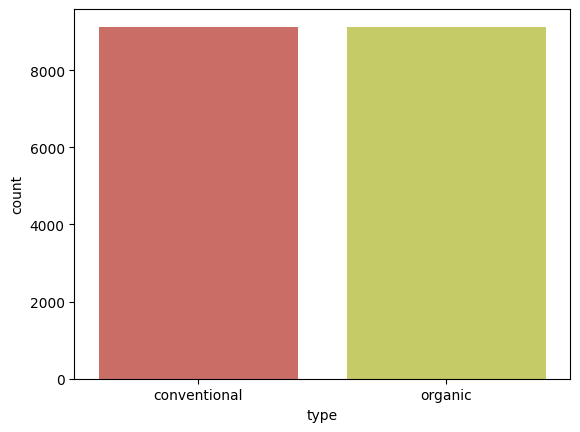

In [18]:
# Visualising the frequency of type in the dataset
print(df.type.value_counts())
sns.countplot(x=df.type)
plt.show()

Both conventional and organic types are equally represented in the dataset.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


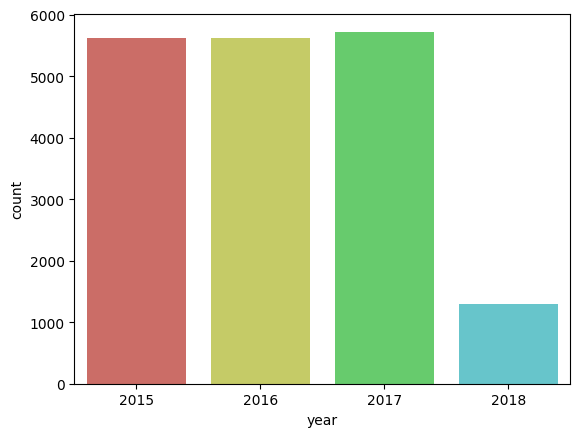

In [19]:
# Visualising the frequency of year in the dataset
print(df.year.value_counts())
sns.countplot(x=df.year)
plt.show()

The year 2018 is less represented than the rest of the years.

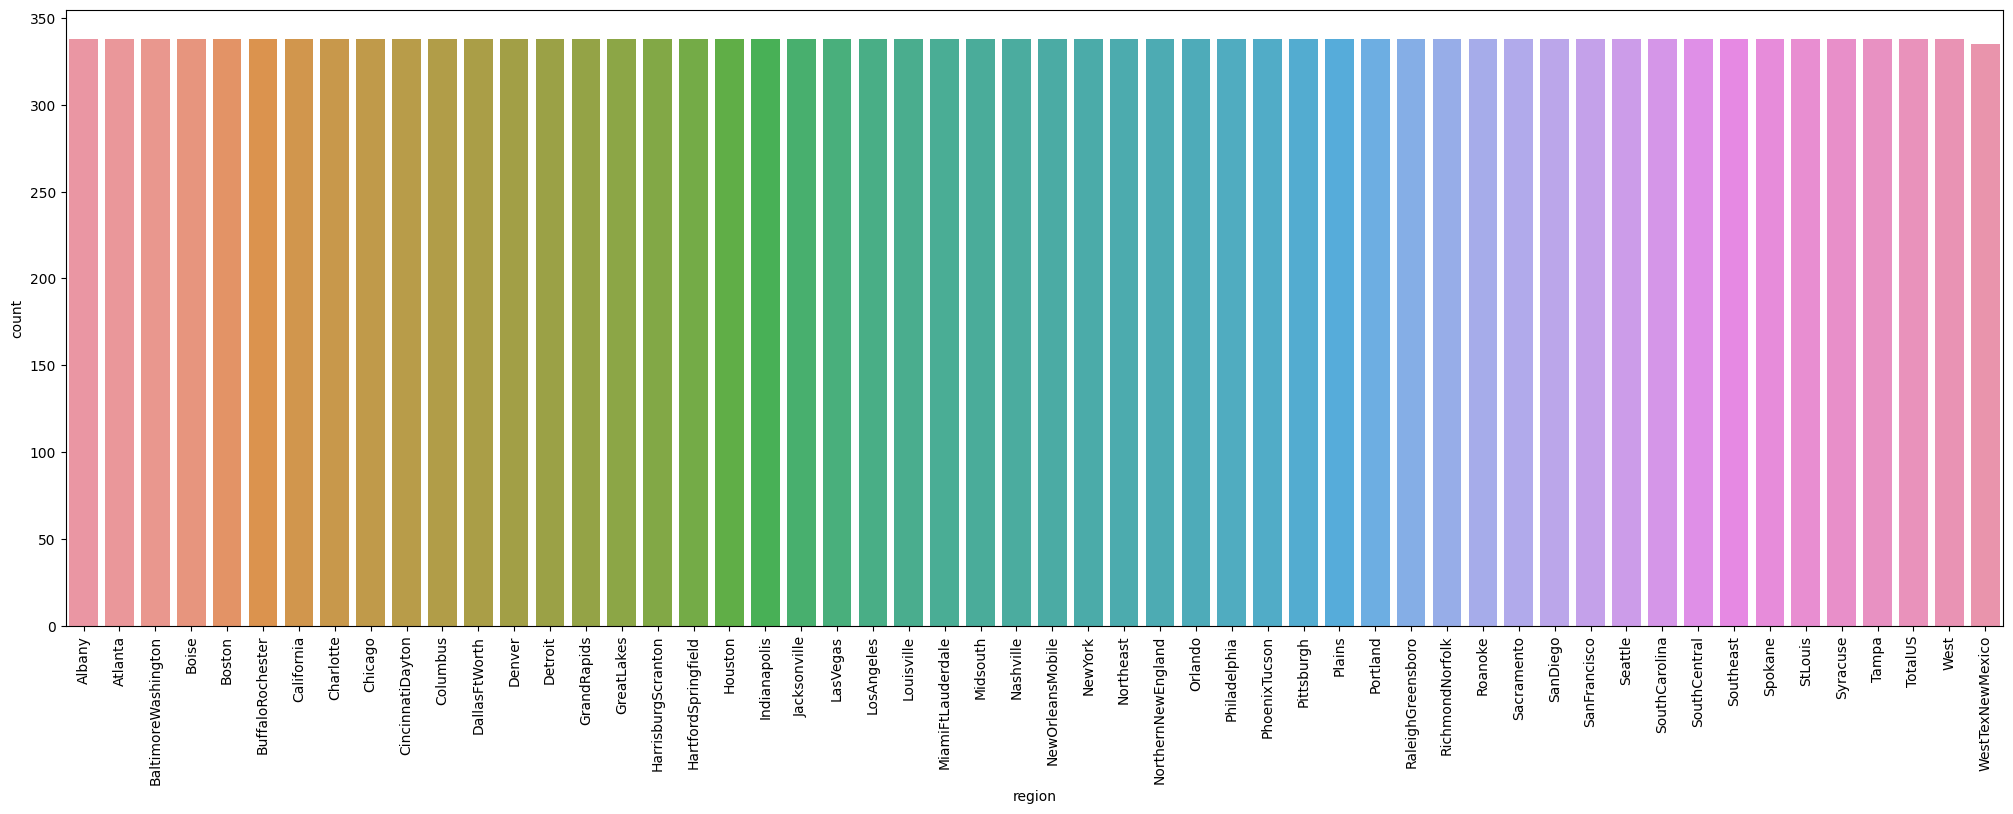

In [20]:
# Visualising the frequency of region in the dataset
plt.figure(figsize=(25, 8))
sns.countplot(x=df.region)
plt.xticks(rotation=90)
plt.show()

Based on the plot, all regions are almost equally represented in the dataset.

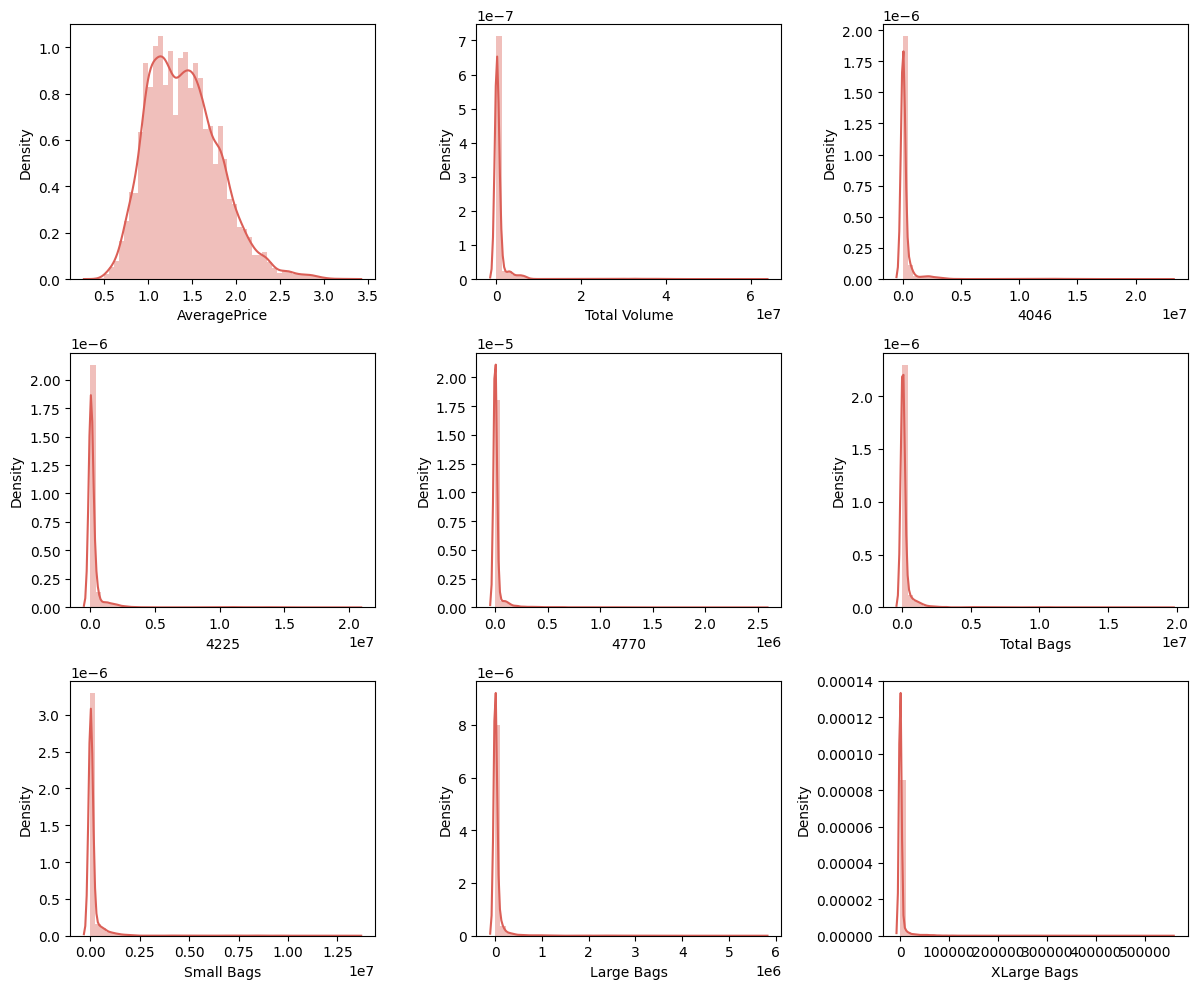

In [21]:
# Data distribution for numerical columns
plt.figure(figsize=(12, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags are all heavily skewed to the right. We need to normalise the data to reduce the skewness.

##### Bivariate analysis

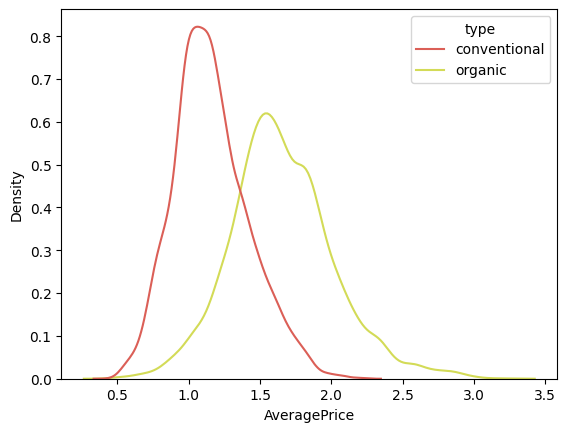

In [22]:
# AveragePrice distribution of avocado types
sns.kdeplot(x="AveragePrice", data=df, hue="type")
plt.show()

The average price in general is higher for organic avocados compared to conventional ones. There are more conventional avocados with average price 1 and there are more organic avocados with average price between 1.5 and 2.

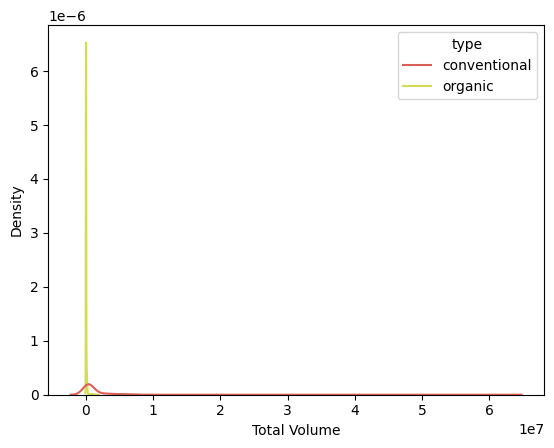

In [23]:
# Total Volume distribution of avocado types
sns.kdeplot(x="Total Volume", data=df, hue="type")
plt.show()

The total volume seems to be higher for conventional type than organic type.

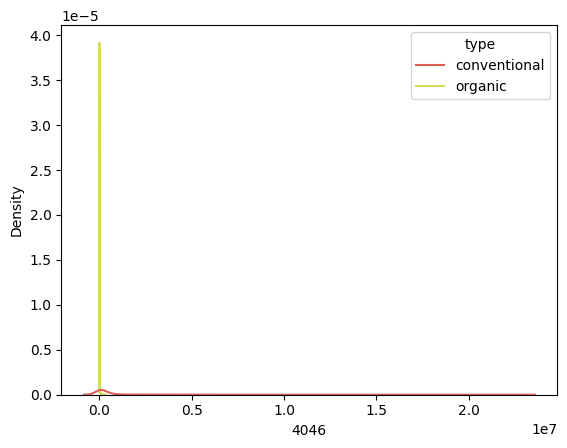

In [24]:
# 4046 distribution of avocado types
sns.kdeplot(x="4046", data=df, hue="type")
plt.show()

There seem to be more conventional avocados with PLU 4046.

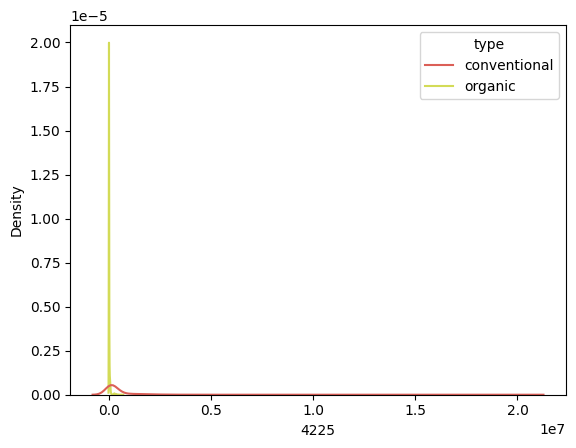

In [25]:
# 4225 distribution of avocado types
sns.kdeplot(x="4225", data=df, hue="type")
plt.show()

There seem to be more conventional avocados with PLU 4225.

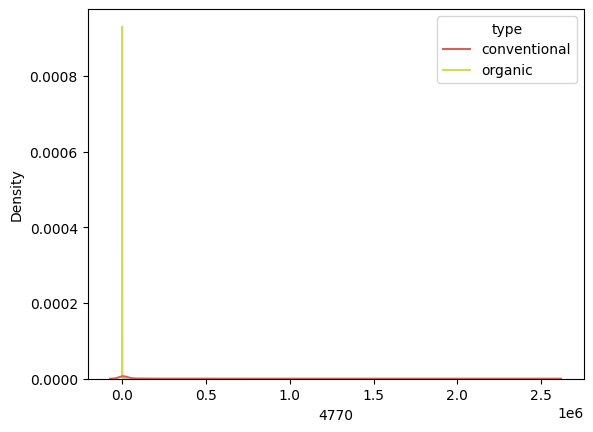

In [26]:
# 4770 distribution of avocado types
sns.kdeplot(x="4770", data=df, hue="type")
plt.show()

There seem to be more conventional avocados with PLU 4770, compared to organic avocados.

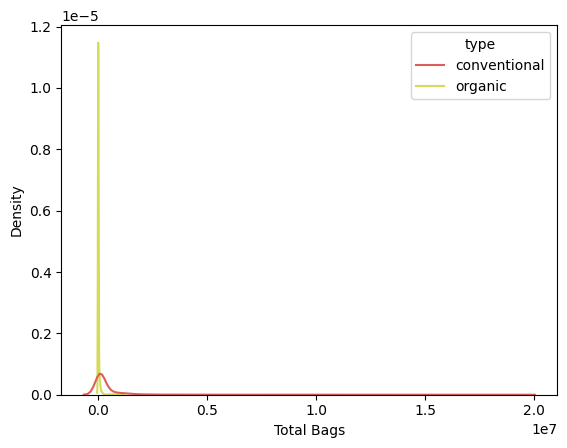

In [27]:
# Total Bags distribution of avocado types
sns.kdeplot(x="Total Bags", data=df, hue="type")
plt.show()

There are more number of total bags for conventional avocados than for organic ones.

In [28]:
# AveragePrice by Year

mean_price_year= df[['year', 'AveragePrice']].groupby('year', as_index = False).mean()
mean_price_year

year  AveragePrice
0  2015      1.375590
1  2016      1.338640
2  2017      1.515128
3  2018      1.347531

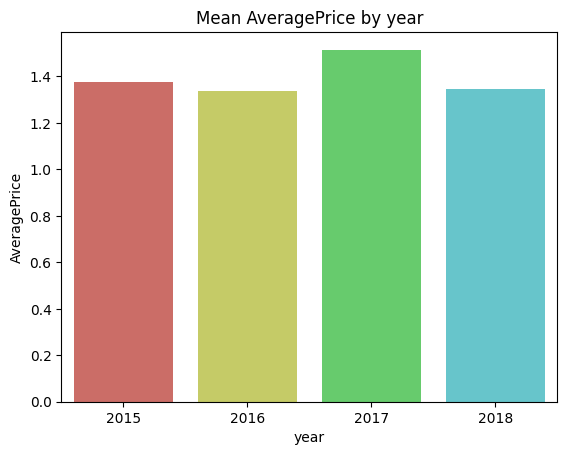

In [29]:
# Visualising the AveragePrice by year

sns.barplot(x=mean_price_year['year'], y=mean_price_year['AveragePrice'])
plt.title('Mean AveragePrice by year')
plt.ylabel('AveragePrice', fontsize = 10)
plt.xlabel('year', fontsize = 10)
plt.show()

Average prices in 2017 was higher than other years.

In [30]:
# Mean Total Volume by Year

mean_volume_year= df[['year', 'Total Volume']].groupby('year', as_index = False).mean()
mean_volume_year

year  Total Volume
0  2015  7.810274e+05
1  2016  8.584206e+05
2  2017  8.623393e+05
3  2018  1.066928e+06

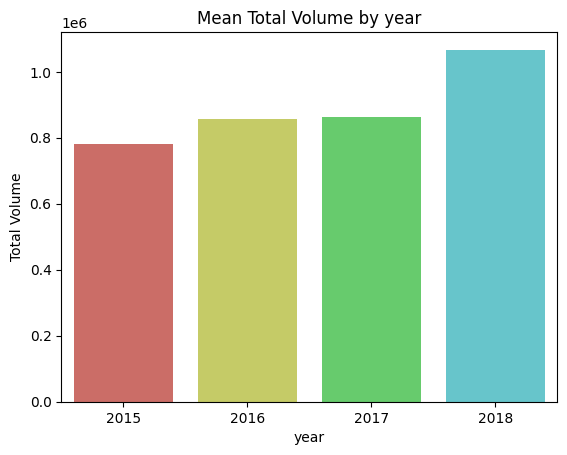

In [31]:
# Visualising the Mean Total Volume by year

sns.barplot(x=mean_volume_year['year'], y=mean_volume_year['Total Volume'])
plt.title('Mean Total Volume by year')
plt.ylabel('Total Volume', fontsize = 10)
plt.xlabel('year', fontsize = 10)
plt.show()

The mean Total Volume was highest in 2018.

In [32]:
# Sum Total Volume by Year

sum_volume_year= df[['year', 'Total Volume']].groupby('year', as_index = False).sum()
sum_volume_year

year  Total Volume
0  2015  4.385469e+09
1  2016  4.820890e+09
2  2017  4.934306e+09
3  2018  1.382738e+09

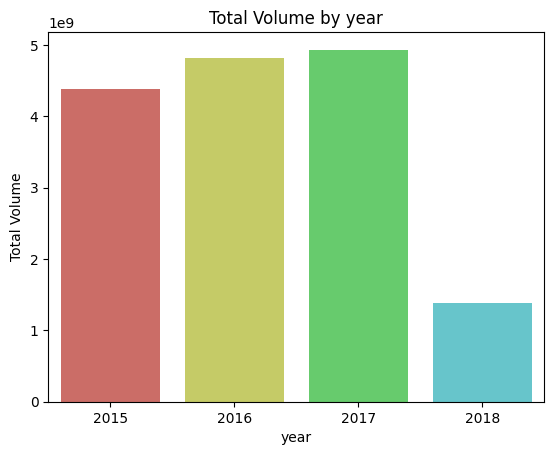

In [33]:
# Visualising the Total Volume by year

sns.barplot(x=sum_volume_year['year'], y=sum_volume_year['Total Volume'])
plt.title('Total Volume by year')
plt.ylabel('Total Volume', fontsize = 10)
plt.xlabel('year', fontsize = 10)
plt.show()

2017 shows the maximum total volume, while 2018 shows the minimum.

The sum of total volumes gives the absolute volume of avocados sold in the years (2015 - 2018), wheres the mean represents the average volume sold everyday of the year.<br>
2018 had higher average volume sales compared to 2017. But the total sales in 2017 exceeded 2018 by a huge margin (Probably because there is less data for 2018 in the dataset.)

In [34]:
# Mean Total Bags by Year

mean_bags_year= df[['year', 'Total Bags']].groupby('year', as_index = False).mean()
mean_bags_year

year     Total Bags
0  2015  137523.105437
1  2016  260533.986204
2  2017  287712.119423
3  2018  379271.564429

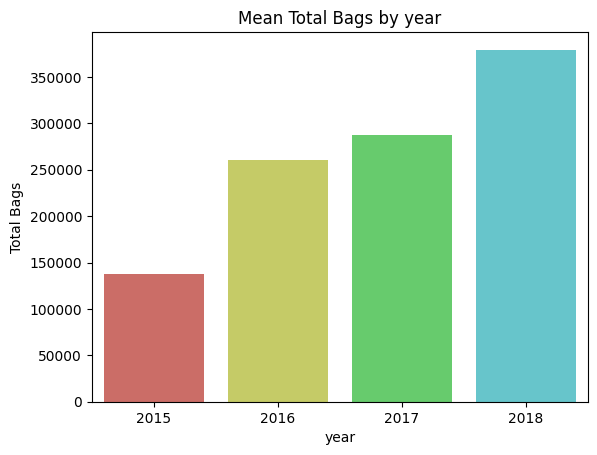

In [35]:
# Visualising the Mean Total Bags by year

sns.barplot(x=mean_bags_year['year'], y=mean_bags_year['Total Bags'])
plt.title('Mean Total Bags by year')
plt.ylabel('Total Bags', fontsize = 10)
plt.xlabel('year', fontsize = 10)
plt.show()

Mean total bags is highest in 2018.

In [36]:
# Sum Total Bags by Year

sum_bags_year= df[['year', 'Total Bags']].groupby('year', as_index = False).sum()
sum_bags_year

year    Total Bags
0  2015  7.721922e+08
1  2016  1.463159e+09
2  2017  1.646289e+09
3  2018  4.915359e+08

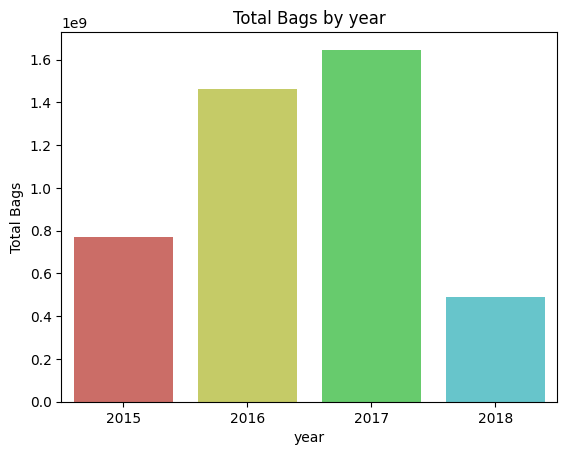

In [37]:
# Visualising the Total Bags by year

sns.barplot(x=sum_bags_year['year'], y=sum_bags_year['Total Bags'])
plt.title('Total Bags by year')
plt.ylabel('Total Bags', fontsize = 10)
plt.xlabel('year', fontsize = 10)
plt.show()

2017 shows the highest number of  total bags, while 2018 shows the minimum.

2018 had higher average number of bags sold compared to 2017. But the total number of bags sold in 2017 exceeded 2018 by a huge margin (Probably because there is less data for 2018 in the dataset.)

In [38]:
# AveragePrice by region

mean_price_region= df[['region', 'AveragePrice']].groupby('region', as_index = False).mean()
mean_price_region

region  AveragePrice
0                Albany      1.561036
1               Atlanta      1.337959
2   BaltimoreWashington      1.534231
3                 Boise      1.348136
4                Boston      1.530888
5      BuffaloRochester      1.516834
6            California      1.395325
7             Charlotte      1.606036
8               Chicago      1.556775
9      CincinnatiDayton      1.209201
10             Columbus      1.252781
11        DallasFtWorth      1.085592
12               Denver      1.218580
13              Detroit      1.276095
14          GrandRapids      1.505000
15           GreatLakes      1.338550
16   HarrisburgScranton      1.513284
17  HartfordSpringfield      1.818639
18              Houston      1.047929
19         Indianapolis      1.313994
20         Jacksonville      1.510947
21             LasVegas      1.380917
22           LosAngeles      1.216006
23           Louisville      1.286686
24    MiamiFtLauderdale      1.428491
25             Midsouth      1.404763
26            Nashville      1.212101
27     NewOrleansMobile      1.304793
28              NewYork      1.727574
29            Northeast      1.601923
30   NorthernNewEngland      1.477396
31              Orlando      1.506213
32         Philadelphia      1.632130
33        PhoenixTucson      1.224438
34           Pittsburgh      1.364320
35               Plains      1.436509
36             Portland      1.317722
37    RaleighGreensboro      1.555118
38      RichmondNorfolk      1.291331
39              Roanoke      1.247929
40           Sacramento      1.621568
41             SanDiego      1.398166
42         SanFrancisco      1.804201
43              Seattle      1.442574
44        SouthCarolina      1.403284
45         SouthCentral      1.101243
46            Southeast      1.398018
47              Spokane      1.445592
48              StLouis      1.430621
49             Syracuse      1.520325
50                Tampa      1.408846
51              TotalUS      1.319024
52                 West      1.272219
53     WestTexNewMexico      1.261701

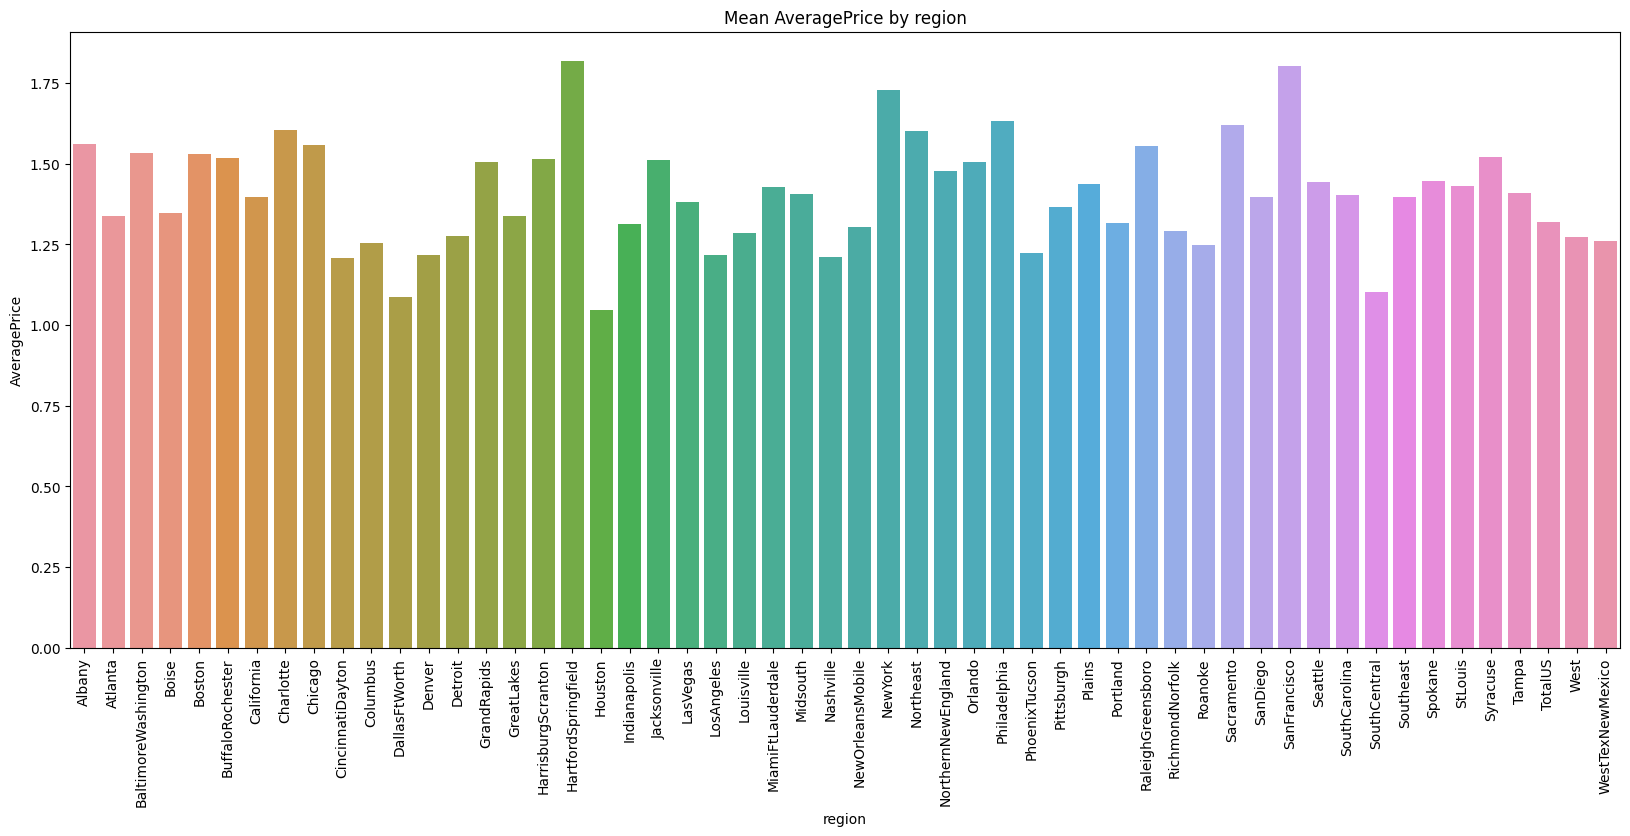

In [39]:
# Visualising the AveragePrice by region

plt.figure(figsize=(20, 8))
sns.barplot(x=mean_price_region['region'], y=mean_price_region['AveragePrice'])
plt.title('Mean AveragePrice by region')
plt.ylabel('AveragePrice', fontsize = 10)
plt.xlabel('region', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

Average prices in HartfordSpringfield and SanFrancisco seem to higher than other regions.

In [40]:
# Mean Total Volume by region

mean_volume_region= df[['region', 'Total Volume']].groupby('region', as_index = False).mean()
mean_volume_region

region  Total Volume
0                Albany  4.753787e+04
1               Atlanta  2.621453e+05
2   BaltimoreWashington  3.985619e+05
3                 Boise  4.264257e+04
4                Boston  2.877929e+05
5      BuffaloRochester  6.793630e+04
6            California  3.044324e+06
7             Charlotte  1.051939e+05
8               Chicago  3.955690e+05
9      CincinnatiDayton  1.317219e+05
10             Columbus  8.873776e+04
11        DallasFtWorth  6.166251e+05
12               Denver  4.109542e+05
13              Detroit  1.876403e+05
14          GrandRapids  8.938383e+04
15           GreatLakes  1.744505e+06
16   HarrisburgScranton  1.236948e+05
17  HartfordSpringfield  1.499128e+05
18              Houston  6.010884e+05
19         Indianapolis  8.953666e+04
20         Jacksonville  8.517753e+04
21             LasVegas  1.608784e+05
22           LosAngeles  1.502653e+06
23           Louisville  4.762427e+04
24    MiamiFtLauderdale  2.889740e+05
25             Midsouth  1.503992e+06
26            Nashville  1.053612e+05
27     NewOrleansMobile  1.351927e+05
28              NewYork  7.122311e+05
29            Northeast  2.110299e+06
30   NorthernNewEngland  2.116358e+05
31              Orlando  1.735524e+05
32         Philadelphia  2.125408e+05
33        PhoenixTucson  5.788264e+05
34           Pittsburgh  5.564008e+04
35               Plains  9.206761e+05
36             Portland  3.270775e+05
37    RaleighGreensboro  1.426116e+05
38      RichmondNorfolk  1.249433e+05
39              Roanoke  7.408879e+04
40           Sacramento  2.223779e+05
41             SanDiego  2.656566e+05
42         SanFrancisco  4.018645e+05
43              Seattle  3.231189e+05
44        SouthCarolina  1.797449e+05
45         SouthCentral  2.991952e+06
46            Southeast  1.820232e+06
47              Spokane  4.605111e+04
48              StLouis  9.489004e+04
49             Syracuse  3.237476e+04
50                Tampa  1.952797e+05
51              TotalUS  1.735130e+07
52                 West  3.215323e+06
53     WestTexNewMexico  4.314085e+05

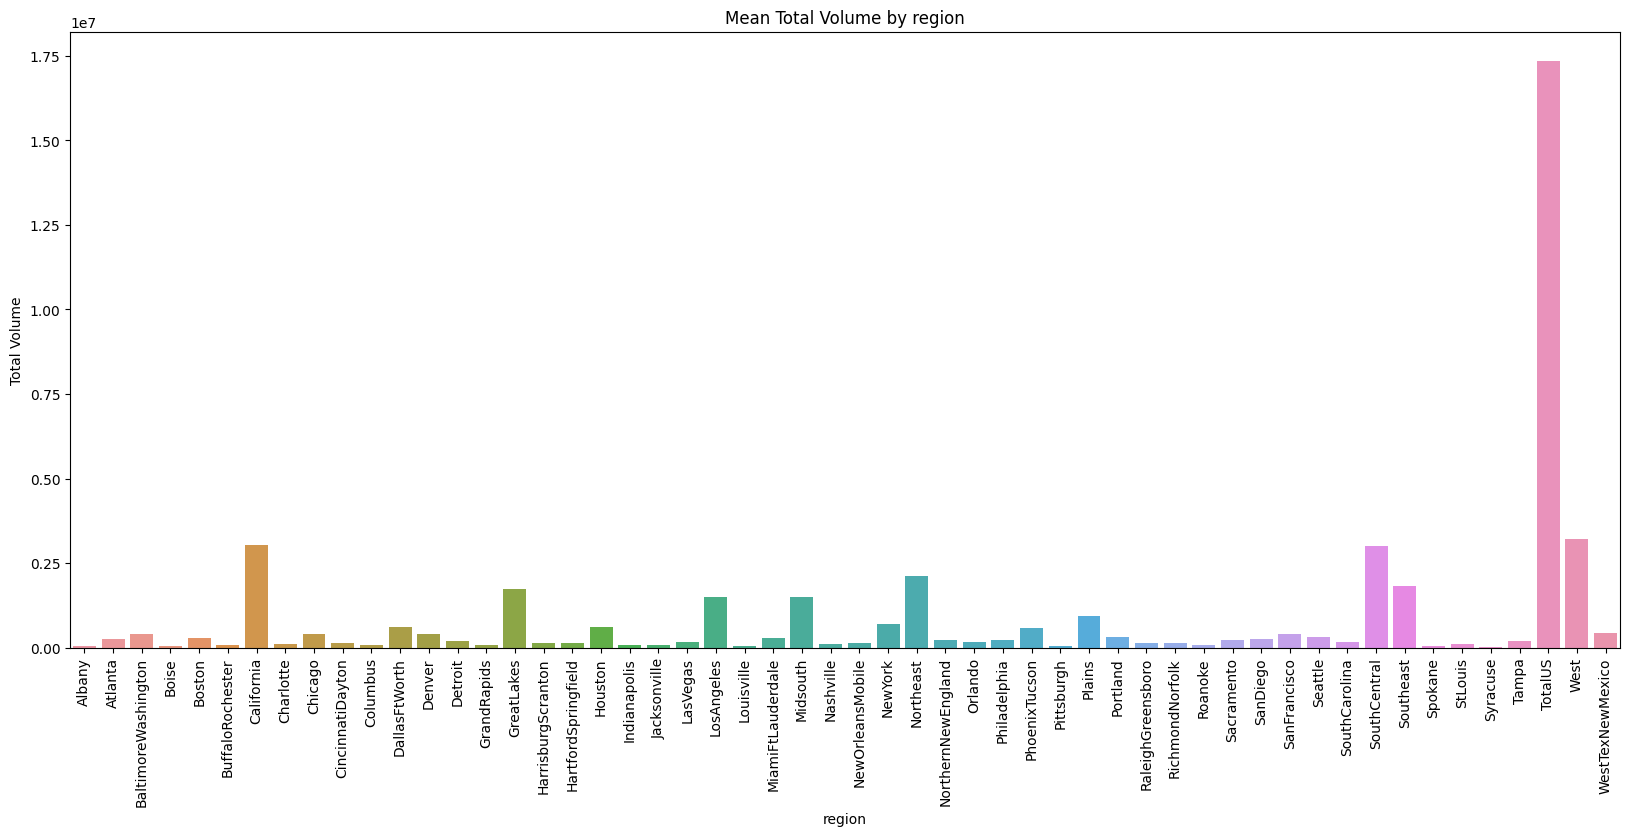

In [41]:
# Visualising the Mean Total Volume by region

plt.figure(figsize=(20, 8))
sns.barplot(x=mean_volume_region['region'], y=mean_volume_region['Total Volume'])
plt.title('Mean Total Volume by region')
plt.ylabel('Total Volume', fontsize = 10)
plt.xlabel('region', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

The mean Total Volume was highest in TotalUS (which is expected). West region seems to have higher mean Total Volume sales than other regions.

In [42]:
# Sum Total Volume by region

sum_volume_region= df[['region', 'Total Volume']].groupby('region', as_index = False).sum()
sum_volume_region

region  Total Volume
0                Albany  1.606780e+07
1               Atlanta  8.860512e+07
2   BaltimoreWashington  1.347139e+08
3                 Boise  1.441319e+07
4                Boston  9.727398e+07
5      BuffaloRochester  2.296247e+07
6            California  1.028982e+09
7             Charlotte  3.555554e+07
8               Chicago  1.337023e+08
9      CincinnatiDayton  4.452201e+07
10             Columbus  2.999336e+07
11        DallasFtWorth  2.084193e+08
12               Denver  1.389025e+08
13              Detroit  6.342242e+07
14          GrandRapids  3.021174e+07
15           GreatLakes  5.896425e+08
16   HarrisburgScranton  4.180886e+07
17  HartfordSpringfield  5.067054e+07
18              Houston  2.031679e+08
19         Indianapolis  3.026339e+07
20         Jacksonville  2.879000e+07
21             LasVegas  5.437691e+07
22           LosAngeles  5.078965e+08
23           Louisville  1.609700e+07
24    MiamiFtLauderdale  9.767322e+07
25             Midsouth  5.083494e+08
26            Nashville  3.561209e+07
27     NewOrleansMobile  4.569514e+07
28              NewYork  2.407341e+08
29            Northeast  7.132809e+08
30   NorthernNewEngland  7.153289e+07
31              Orlando  5.866070e+07
32         Philadelphia  7.183880e+07
33        PhoenixTucson  1.956433e+08
34           Pittsburgh  1.880635e+07
35               Plains  3.111885e+08
36             Portland  1.105522e+08
37    RaleighGreensboro  4.820273e+07
38      RichmondNorfolk  4.223085e+07
39              Roanoke  2.504201e+07
40           Sacramento  7.516375e+07
41             SanDiego  8.979192e+07
42         SanFrancisco  1.358302e+08
43              Seattle  1.092142e+08
44        SouthCarolina  6.075377e+07
45         SouthCentral  1.011280e+09
46            Southeast  6.152384e+08
47              Spokane  1.556528e+07
48              StLouis  3.207283e+07
49             Syracuse  1.094267e+07
50                Tampa  6.600454e+07
51              TotalUS  5.864740e+09
52                 West  1.086779e+09
53     WestTexNewMexico  1.445218e+08

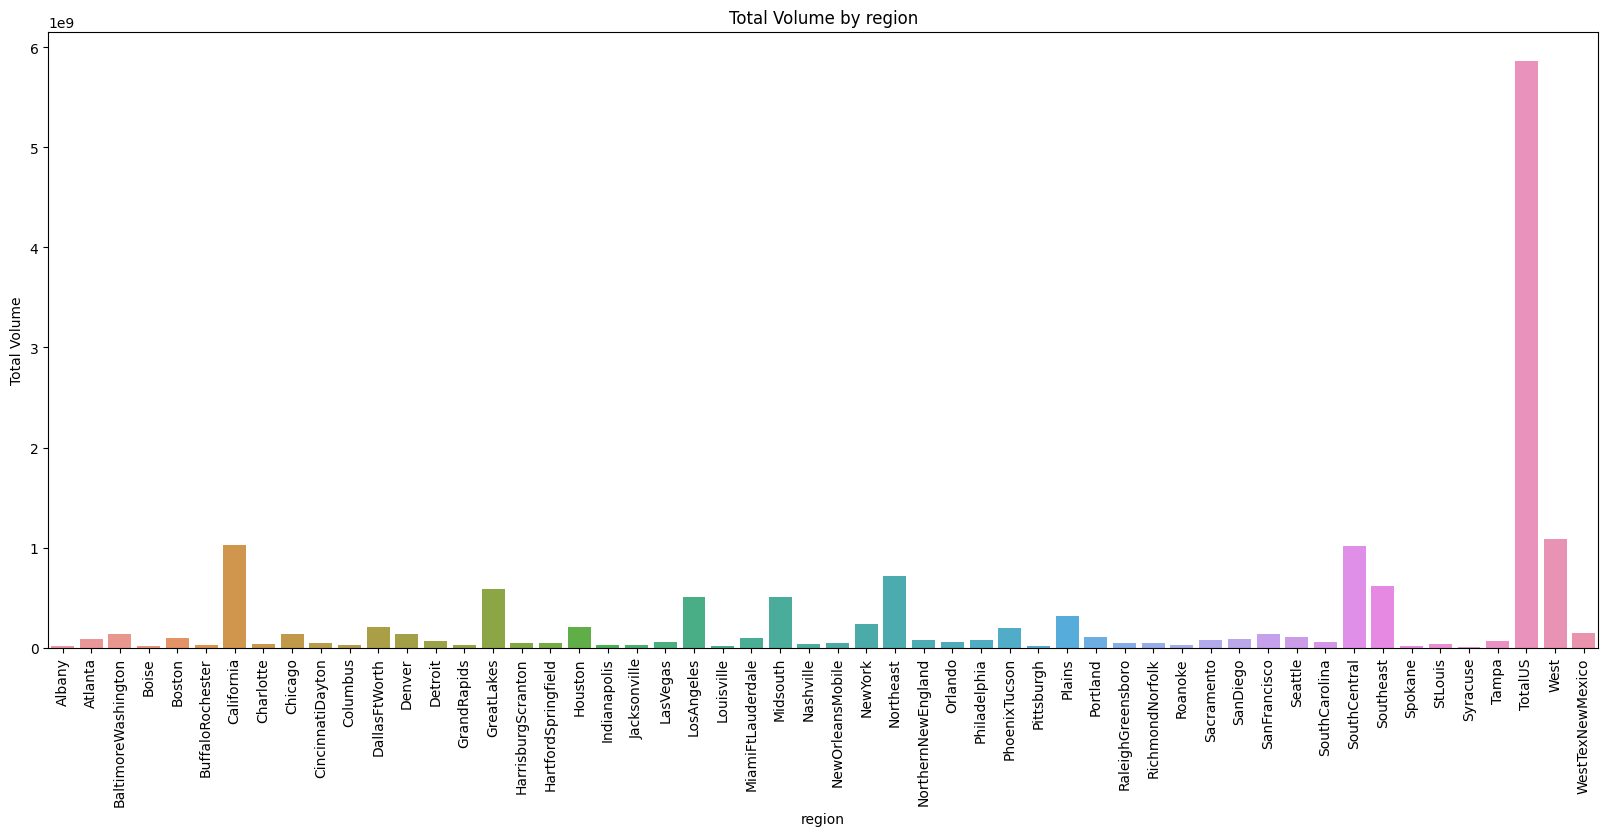

In [43]:
# Visualising the Total Volume by region

plt.figure(figsize=(20, 8))
sns.barplot(x=sum_volume_region['region'], y=sum_volume_region['Total Volume'])
plt.title('Total Volume by region')
plt.ylabel('Total Volume', fontsize = 10)
plt.xlabel('region', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

The Total Volume of sales was highest in TotalUS (which is expected). West region seems to have higher Total Volume sales than other regions.

In [44]:
# Mean Total Bags by region

mean_bags_region= df[['region', 'Total Bags']].groupby('region', as_index = False).mean()
mean_bags_region

region    Total Bags
0                Albany  7.929747e+03
1               Atlanta  8.449856e+04
2   BaltimoreWashington  1.044561e+05
3                 Boise  1.597459e+04
4                Boston  6.359609e+04
5      BuffaloRochester  3.435134e+04
6            California  7.298290e+05
7             Charlotte  3.460930e+04
8               Chicago  4.989763e+04
9      CincinnatiDayton  6.182816e+04
10             Columbus  2.963428e+04
11        DallasFtWorth  1.374845e+05
12               Denver  1.744290e+05
13              Detroit  7.177534e+04
14          GrandRapids  2.712750e+04
15           GreatLakes  5.283303e+05
16   HarrisburgScranton  4.002738e+04
17  HartfordSpringfield  3.352962e+04
18              Houston  1.485653e+05
19         Indianapolis  3.544618e+04
20         Jacksonville  2.875186e+04
21             LasVegas  5.341122e+04
22           LosAngeles  4.978240e+05
23           Louisville  1.963103e+04
24    MiamiFtLauderdale  6.957527e+04
25             Midsouth  4.630581e+05
26            Nashville  3.836440e+04
27     NewOrleansMobile  4.221580e+04
28              NewYork  2.011661e+05
29            Northeast  5.828059e+05
30   NorthernNewEngland  4.113913e+04
31              Orlando  4.988651e+04
32         Philadelphia  7.063678e+04
33        PhoenixTucson  1.151131e+05
34           Pittsburgh  2.143628e+04
35               Plains  2.303172e+05
36             Portland  1.464626e+05
37    RaleighGreensboro  4.638070e+04
38      RichmondNorfolk  3.700659e+04
39              Roanoke  2.837570e+04
40           Sacramento  2.657476e+04
41             SanDiego  6.906115e+04
42         SanFrancisco  4.405599e+04
43              Seattle  1.499746e+05
44        SouthCarolina  5.370761e+04
45         SouthCentral  6.905102e+05
46            Southeast  5.370640e+05
47              Spokane  1.850407e+04
48              StLouis  4.359772e+04
49             Syracuse  1.240363e+04
50                Tampa  5.768252e+04
51              TotalUS  4.847931e+06
52                 West  1.086017e+06
53     WestTexNewMexico  1.053627e+05

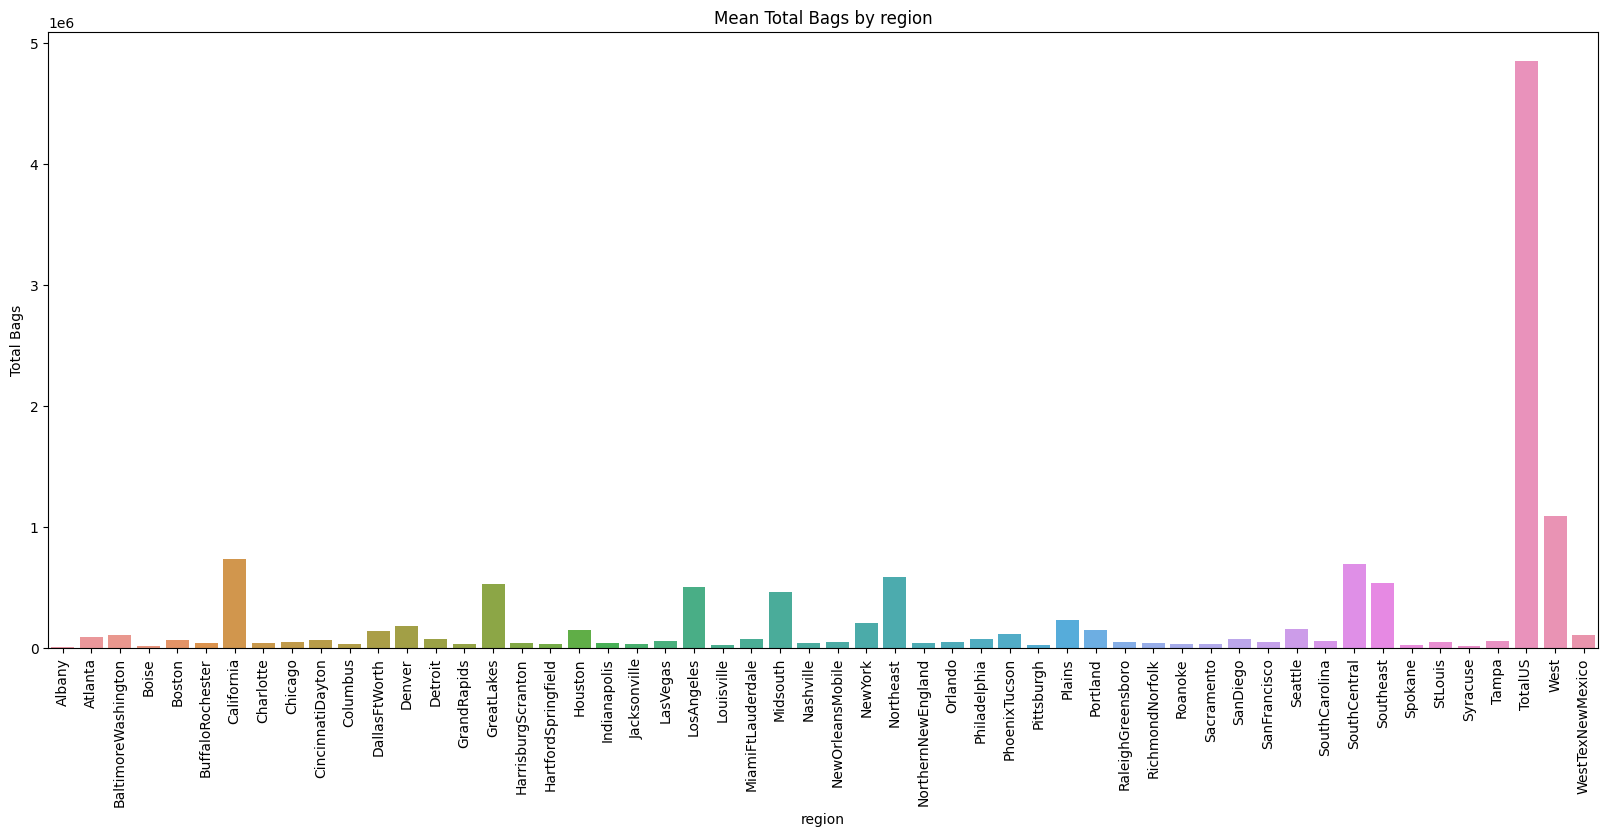

In [45]:
# Visualising the Mean Total Bags by region

plt.figure(figsize=(20, 8))
sns.barplot(x=mean_bags_region['region'], y=mean_bags_region['Total Bags'])
plt.title('Mean Total Bags by region')
plt.ylabel('Total Bags', fontsize = 10)
plt.xlabel('region', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

Mean total bags is highest for TotalUS, then West region.

In [46]:
# Sum Total Bags by region

sum_bags_region= df[['region', 'Total Bags']].groupby('region', as_index = False).sum()
sum_bags_region

region    Total Bags
0                Albany  2.680255e+06
1               Atlanta  2.856051e+07
2   BaltimoreWashington  3.530615e+07
3                 Boise  5.399412e+06
4                Boston  2.149548e+07
5      BuffaloRochester  1.161075e+07
6            California  2.466822e+08
7             Charlotte  1.169794e+07
8               Chicago  1.686540e+07
9      CincinnatiDayton  2.089792e+07
10             Columbus  1.001639e+07
11        DallasFtWorth  4.646975e+07
12               Denver  5.895701e+07
13              Detroit  2.426007e+07
14          GrandRapids  9.169094e+06
15           GreatLakes  1.785756e+08
16   HarrisburgScranton  1.352925e+07
17  HartfordSpringfield  1.133301e+07
18              Houston  5.021506e+07
19         Indianapolis  1.198081e+07
20         Jacksonville  9.718127e+06
21             LasVegas  1.805299e+07
22           LosAngeles  1.682645e+08
23           Louisville  6.635289e+06
24    MiamiFtLauderdale  2.351644e+07
25             Midsouth  1.565136e+08
26            Nashville  1.296717e+07
27     NewOrleansMobile  1.426894e+07
28              NewYork  6.799416e+07
29            Northeast  1.969884e+08
30   NorthernNewEngland  1.390503e+07
31              Orlando  1.686164e+07
32         Philadelphia  2.387523e+07
33        PhoenixTucson  3.890824e+07
34           Pittsburgh  7.245462e+06
35               Plains  7.784720e+07
36             Portland  4.950436e+07
37    RaleighGreensboro  1.567668e+07
38      RichmondNorfolk  1.250823e+07
39              Roanoke  9.590988e+06
40           Sacramento  8.982268e+06
41             SanDiego  2.334267e+07
42         SanFrancisco  1.489092e+07
43              Seattle  5.069140e+07
44        SouthCarolina  1.815317e+07
45         SouthCentral  2.333924e+08
46            Southeast  1.815276e+08
47              Spokane  6.254376e+06
48              StLouis  1.473603e+07
49             Syracuse  4.192427e+06
50                Tampa  1.949669e+07
51              TotalUS  1.638601e+09
52                 West  3.670736e+08
53     WestTexNewMexico  3.529652e+07

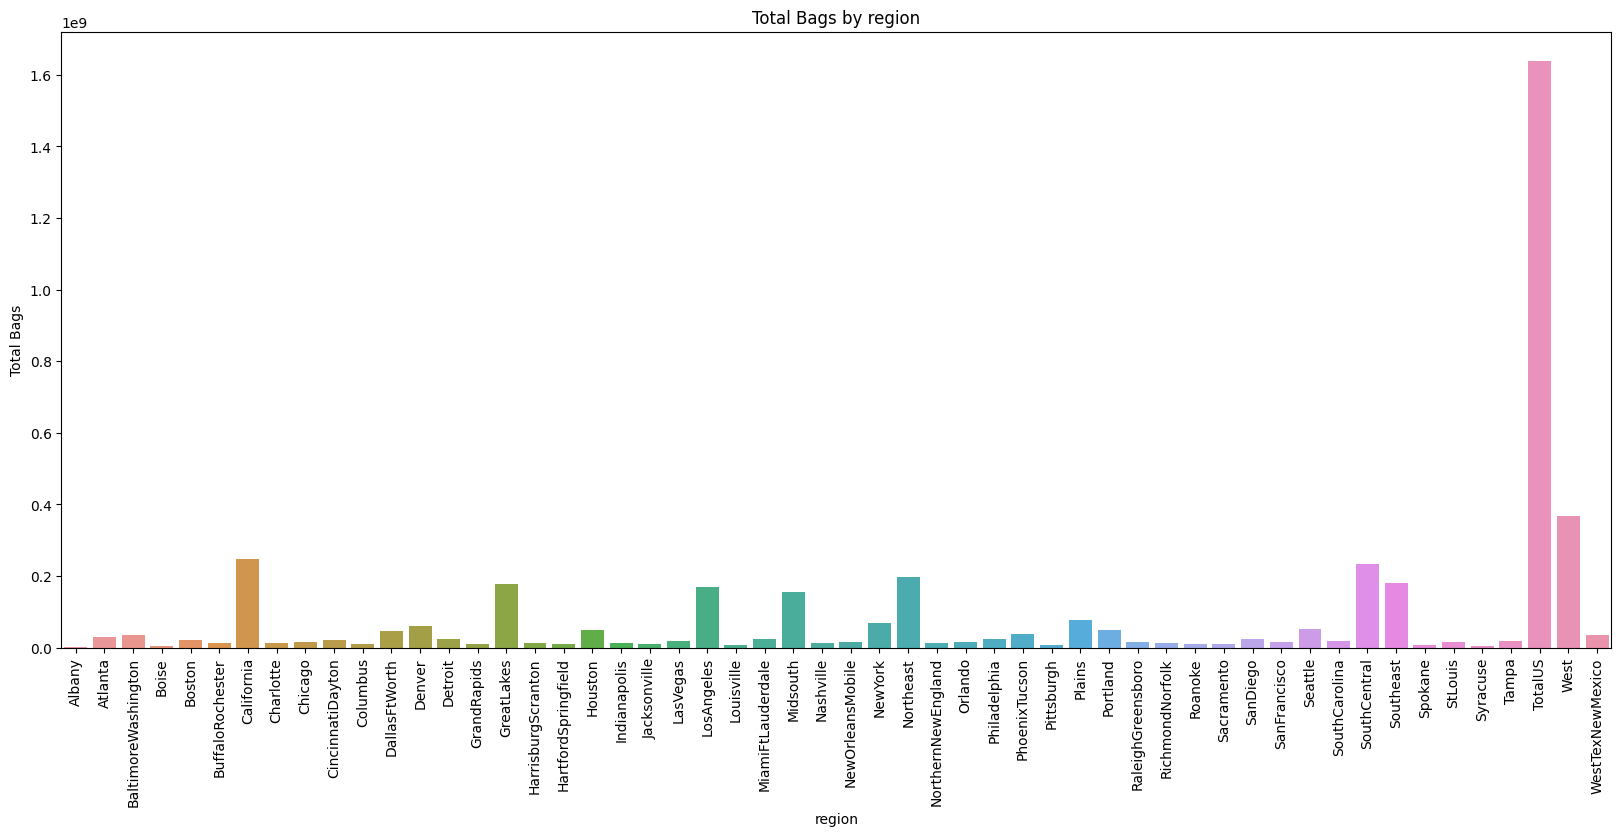

In [47]:
# Visualising the Total Bags by region

plt.figure(figsize=(20, 8))
sns.barplot(x=sum_bags_region['region'], y=sum_bags_region['Total Bags'])
plt.title('Total Bags by region')
plt.ylabel('Total Bags', fontsize = 10)
plt.xlabel('region', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

TotalUS has the highest number of bags sold. West region has a higher number of bags sold than any other region.

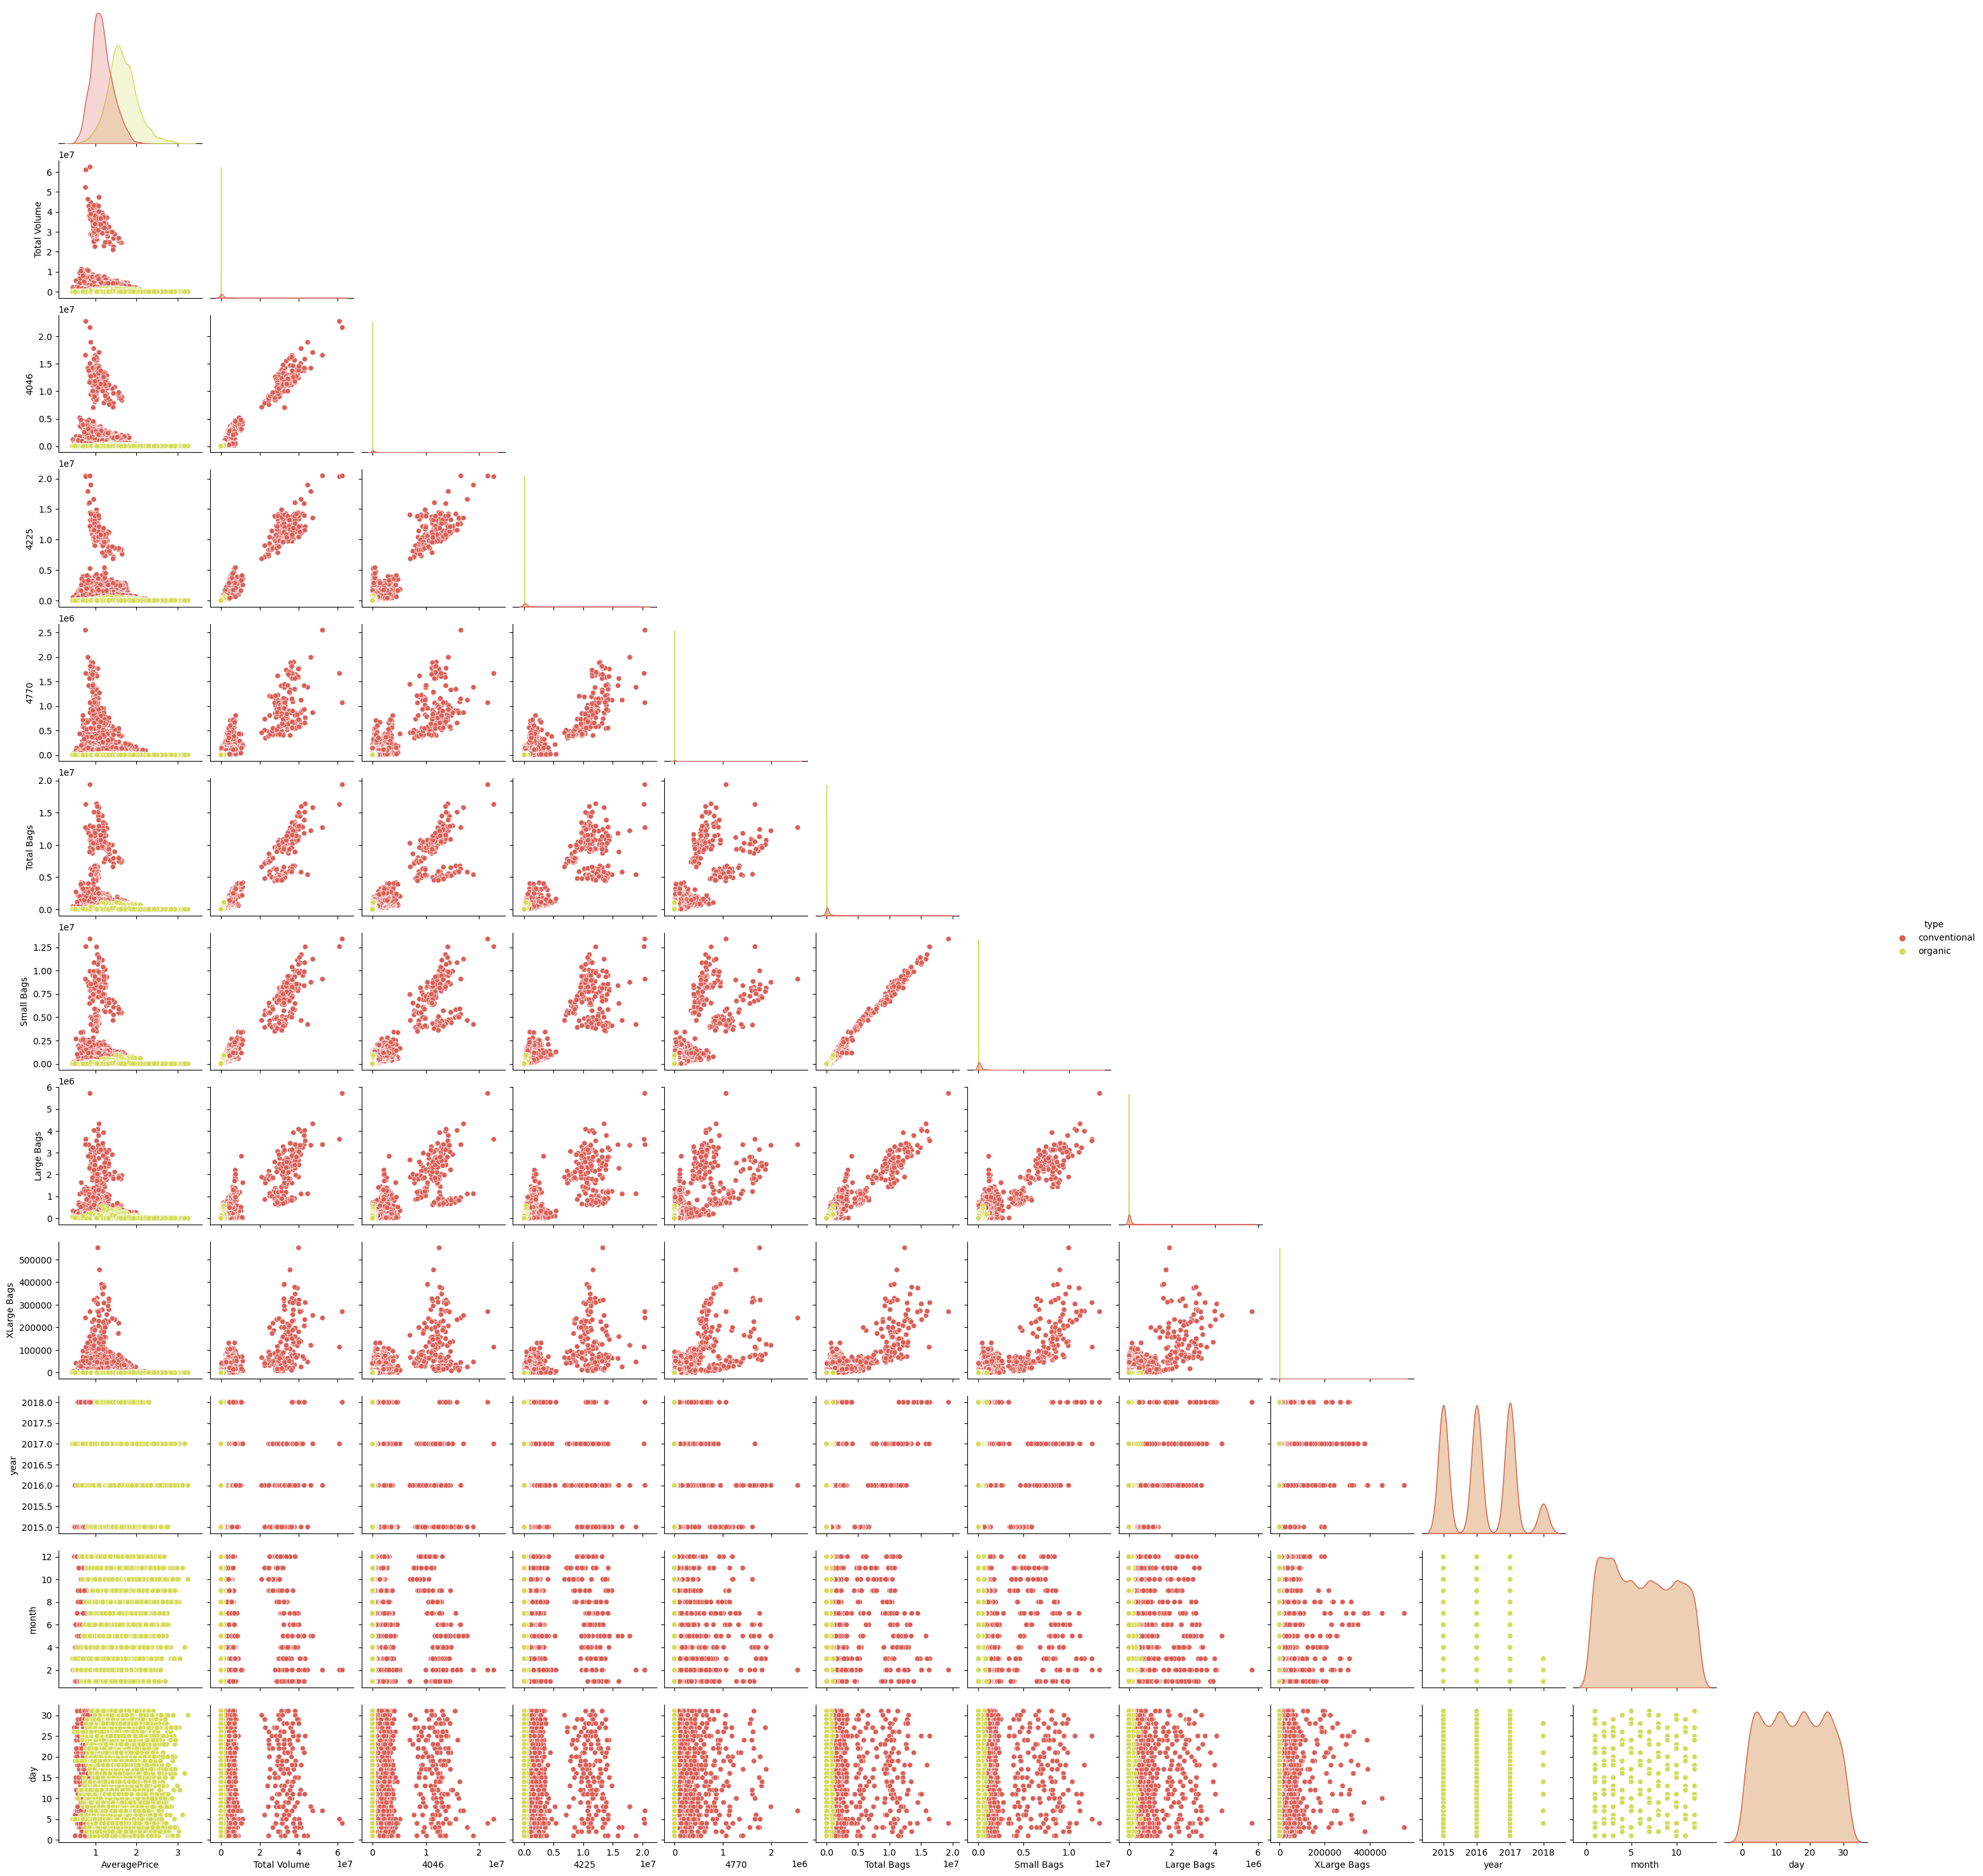

In [48]:
sns.pairplot(data = df, corner = True, hue = "type")
plt.show()

Observations from the pairplot:
- There seems to be very strong positive correlation between Total Bags and Small Bags.
- High correlation is also observed between Total Volume and 4046, 4225, 4770 as well as Total Bags.

##### Multivariate analysis

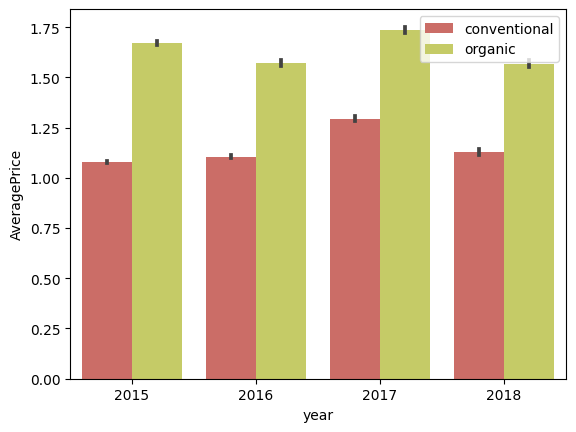

In [49]:
# AveragePrice by year by type

sns.barplot(x='year',y='AveragePrice', hue="type", data=df)
plt.legend(loc = 'best')
plt.show()

The average prices of organic avocados is observed to be always greater than the average prices of conventional avocados.

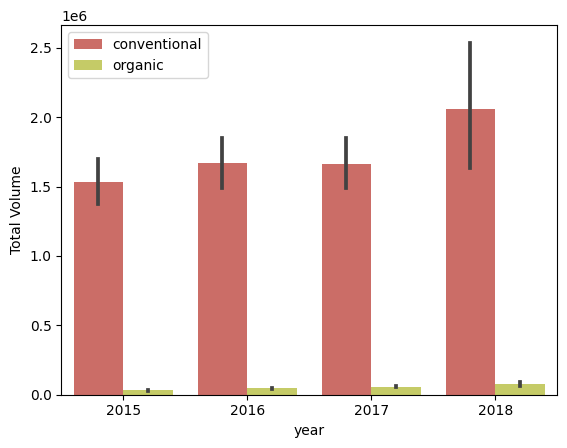

In [50]:
# Mean Volume by year by type

sns.barplot(x='year',y='Total Volume', hue="type", data=df)
plt.legend(loc = 'best')
plt.show()

The average volume of conventional avocados sold is a lot higher than the average volume of organic avocados sold , every year.

In [51]:
# Sum of Total Volume by Year

type_df = df.groupby(['year', 'type'])['Total Volume'].sum()
type_df

year  type        
2015  conventional    4.296599e+09
      organic         8.886943e+07
2016  conventional    4.690250e+09
      organic         1.306401e+08
2017  conventional    4.766166e+09
      organic         1.681399e+08
2018  conventional    1.334206e+09
      organic         4.853227e+07
Name: Total Volume, dtype: float64

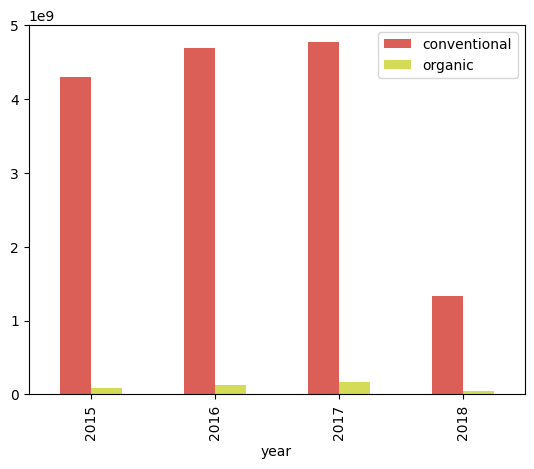

In [52]:
# Total Volume by year by type

type_df.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.show()

The total volume of avocados sold in 2017 were higher for both conventional and organic avocados compared to other years.

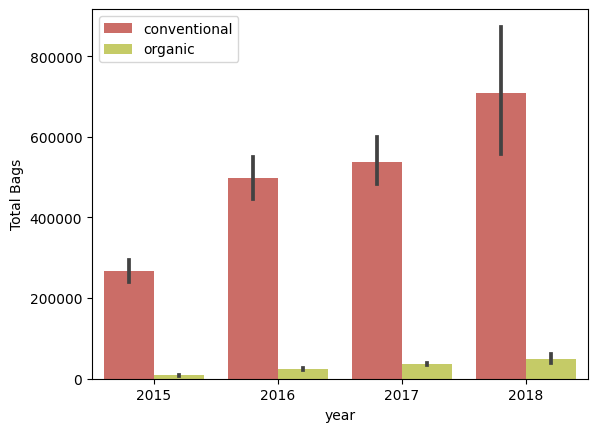

In [53]:
# Mean Bags by year by type

sns.barplot(x='year',y='Total Bags', hue="type", data=df)
plt.legend(loc = 'best')
plt.show()

For each of the years, the average number of bags of conventional avocados sold is a lot higher than the average number of organic avocados sold.

In [54]:
# Sum of Total Bags by Year

type_df = df.groupby(['year', 'type'])['Total Bags'].sum()
type_df

year  type        
2015  conventional    7.481009e+08
      organic         2.409134e+07
2016  conventional    1.398101e+09
      organic         6.505765e+07
2017  conventional    1.541193e+09
      organic         1.050962e+08
2018  conventional    4.593696e+08
      organic         3.216630e+07
Name: Total Bags, dtype: float64

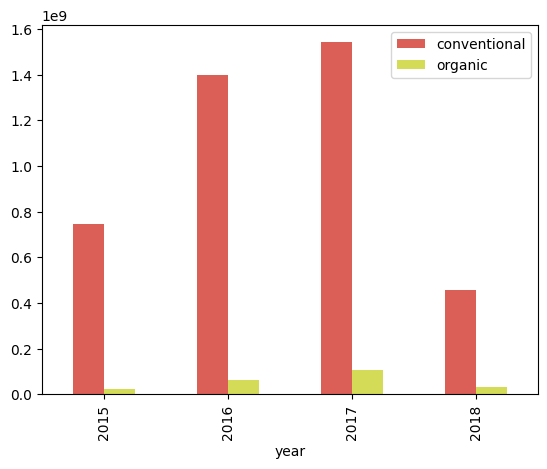

In [55]:
# Total Bags by year by type

type_df.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.show()

The highest number of bags of avocado were sold in 2017, for both conventional and organic avocados.

##### Time Series Analysis

In [56]:
date_df = df.groupby(['Date']).mean()
date_df

AveragePrice  Total Volume           4046           4225  \
Date                                                                   
2015-01-04      1.301296  7.840216e+05  306465.358704  341213.318796   
2015-01-11      1.370648  7.273686e+05  287260.786944  303781.757778   
2015-01-18      1.391111  7.258221e+05  294469.507963  293167.054907   
2015-01-25      1.397130  7.080211e+05  299121.600648  267862.244167   
2015-02-01      1.247037  1.106048e+06  465675.823704  469409.541481   
...                  ...           ...            ...            ...   
2018-02-25      1.359630  1.011402e+06  334272.681667  267146.528056   
2018-03-04      1.350185  1.035601e+06  348894.357407  292967.505741   
2018-03-11      1.335093  1.032085e+06  342727.715556  278956.907037   
2018-03-18      1.313704  1.052537e+06  332766.612685  285818.850370   
2018-03-25      1.346852  1.095083e+06  340603.336204  308708.172407   

                    4770     Total Bags     Small Bags     Large Bags  \
Date                                                                    
2015-01-04  21100.172593  115242.790648   91759.341667   23015.332407   
2015-01-11  21751.550463  114574.490370   95860.522407   18313.259259   
2015-01-18  20446.764352  117738.747593   97674.575093   19866.538241   
2015-01-25  19244.248704  121793.027500  100715.897685   20859.406667   
2015-02-01  34143.419537  136819.689815  107192.904167   28462.864722   
...                  ...            ...            ...            ...   
2018-02-25  17937.882870  392024.723519  279950.488796  104767.552315   
2018-03-04  14315.347500  379405.846574  285591.463519   87350.231019   
2018-03-11  17654.501852  392740.366667  303336.144352   82858.199630   
2018-03-18  16241.096204  417703.096204  308390.813426  102752.034167   
2018-03-25  18933.206019  426813.847407  328807.009444   90548.670093   

            XLarge Bags    year  month   day  
Date                                          
2015-01-04   468.116574  2015.0    1.0   4.0  
2015-01-11   400.708704  2015.0    1.0  11.0  
2015-01-18   197.634259  2015.0    1.0  18.0  
2015-01-25   217.723148  2015.0    1.0  25.0  
2015-02-01  1163.920926  2015.0    2.0   1.0  
...                 ...     ...    ...   ...  
2018-02-25  7306.682407  2018.0    2.0  25.0  
2018-03-04  6464.152037  2018.0    3.0   4.0  
2018-03-11  6546.022685  2018.0    3.0  11.0  
2018-03-18  6560.248611  2018.0    3.0  18.0  
2018-03-25  7458.167870  2018.0    3.0  25.0  

[169 rows x 12 columns]

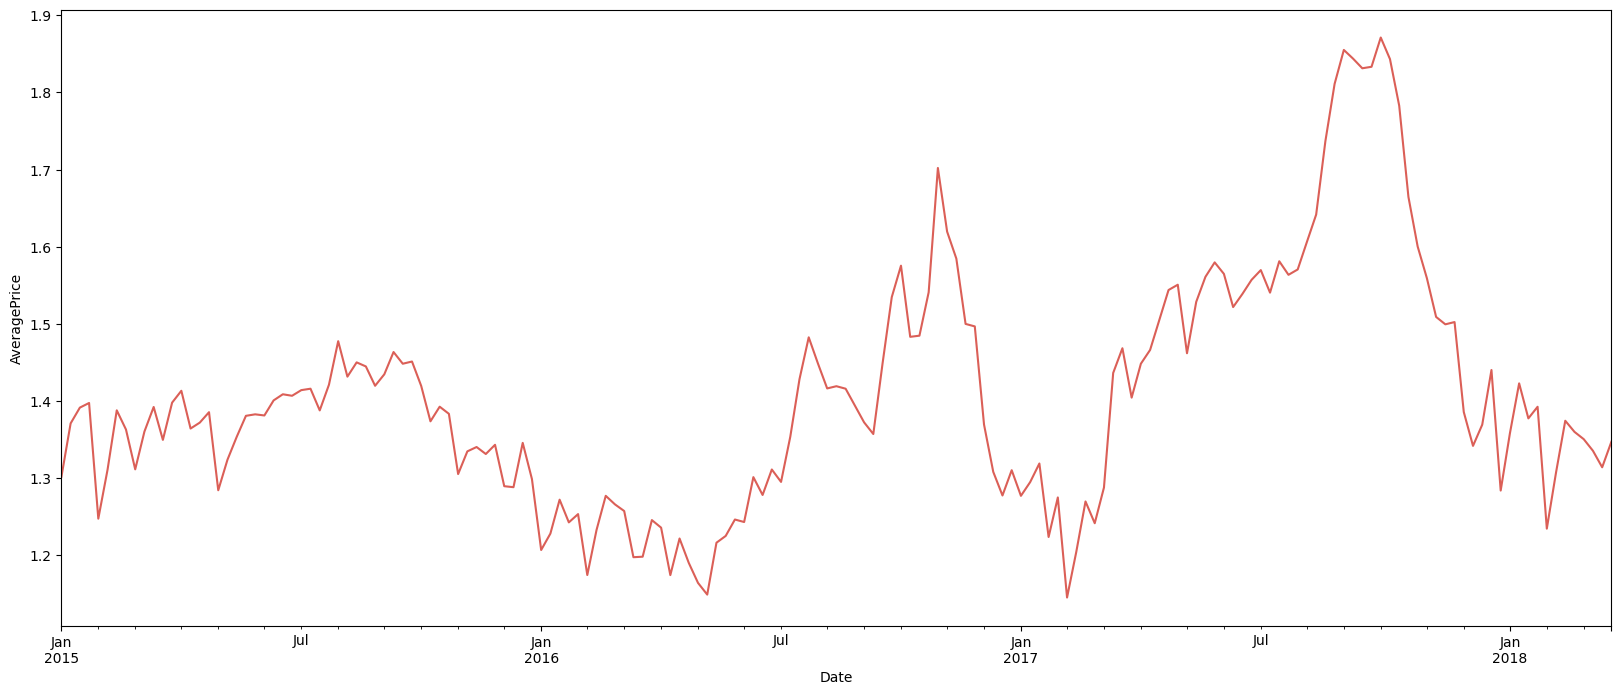

In [57]:
plt.figure(figsize=(20,8))
date_df['AveragePrice'].plot()
plt.ylabel('AveragePrice')
plt.show()

The plot shows that the average price of avocado starts increasing around August every year and decreases around December. It also shows that the average price has  increased during August to December period for each year compared to the year before that. The average monthly plot will show more details in this pattern.

In [58]:
month_df = df.groupby(['month']).mean()
month_df

AveragePrice  Total Volume           4046           4225          4770  \
month                                                                           
1          1.311019  9.035654e+05  297091.451924  328309.637593  23469.554733   
2          1.274387  1.018825e+06  356672.920885  348558.374931  28394.881146   
3          1.332255  8.845054e+05  305386.962173  294504.626585  24952.196558   
4          1.374380  8.801935e+05  314698.492251  291711.817500  25904.380947   
5          1.346601  9.727150e+05  349946.910390  336679.188056  28377.930767   
6          1.408964  9.293397e+05  337007.417141  302172.503879  28951.149985   
7          1.462077  8.590482e+05  292245.798466  294714.809451  24521.787639   
8          1.512514  8.036857e+05  290614.959295  282362.133625  19615.213554   
9          1.572654  7.533192e+05  258561.835085  275712.053642  17425.176389   
10         1.579683  6.803941e+05  215893.534597  251353.692341  17180.175635   
11         1.455563  6.796073e+05  229947.044594  240768.542308  15966.876745   
12         1.331112  7.746305e+05  250340.566037  269376.341262  17081.481205   

          Total Bags     Small Bags    Large Bags  XLarge Bags         year  \
month                                                                         
1      254693.975550  190706.250520  61666.720267  2321.004763  2016.500000   
2      285196.078073  213055.035712  68894.364792  3246.677569  2016.500000   
3      259658.362021  201308.615027  55152.129385  3197.617609  2016.411765   
4      247878.811068  189665.529252  55711.218697  2502.063120  2016.076923   
5      257710.995238  193425.140708  61144.593591  3141.260939  2015.928571   
6      261208.611175  202713.415943  53218.635417  5276.559815  2015.998454   
7      247558.728228  193294.104643  47831.054795  6433.567467  2016.071429   
8      211092.107201  166253.229174  41272.813348  3566.063967  2015.923077   
9      201618.164769  154073.842739  45327.096898  2217.225131  2016.000000   
10     195964.540364  145723.620754  48701.057348  1539.862262  2016.071429   
11     192921.858070  142966.201973  48492.197920  1463.451766  2015.923077   
12     237829.212438  177403.570371  57849.078182  2576.563172  2016.077691   

             day  
month             
1      16.000000  
2      14.750000  
3      15.352941  
4      15.076923  
5      16.428571  
6      15.824575  
7      16.214286  
8      16.615385  
9      14.833333  
10     15.214286  
11     15.615385  
12     16.084105

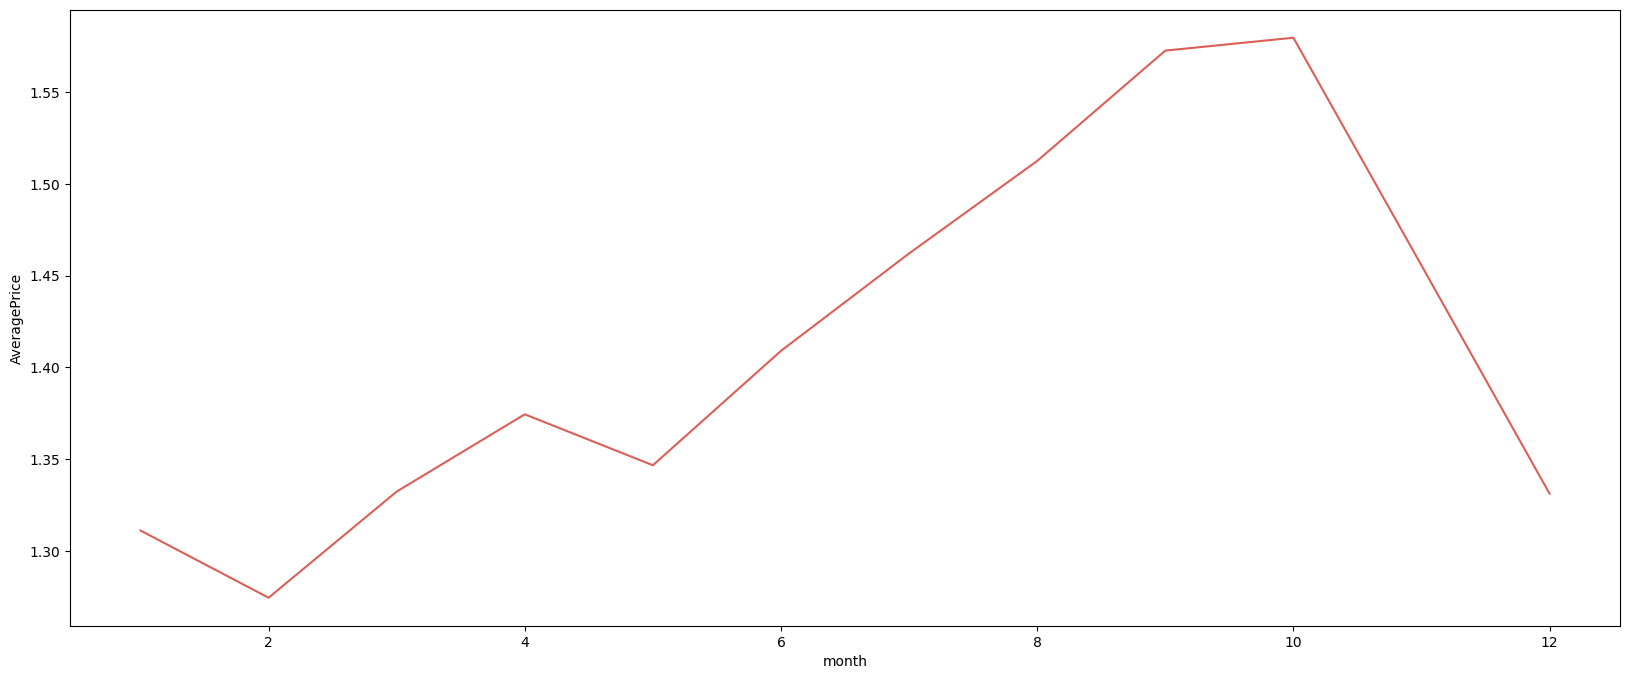

In [59]:
plt.figure(figsize=(20,8))
month_df['AveragePrice'].plot()
plt.ylabel('AveragePrice')
plt.show()

From this plot, we can observe that there is a slight increase in average price from Februrary to March, and then a slight decrease in April. From May to October the average price keeps climbing and then strats to fall rapidly in November and December.

In [60]:
# Average price by type and Date

date_type_df = df.groupby(['Date', 'type'])['AveragePrice'].mean()
date_type_df

Date        type        
2015-01-04  conventional    1.009630
            organic         1.592963
2015-01-11  conventional    1.111296
            organic         1.630000
2015-01-18  conventional    1.133519
                              ...   
2018-03-11  organic         1.533519
2018-03-18  conventional    1.096296
            organic         1.531111
2018-03-25  conventional    1.147222
            organic         1.546481
Name: AveragePrice, Length: 338, dtype: float64

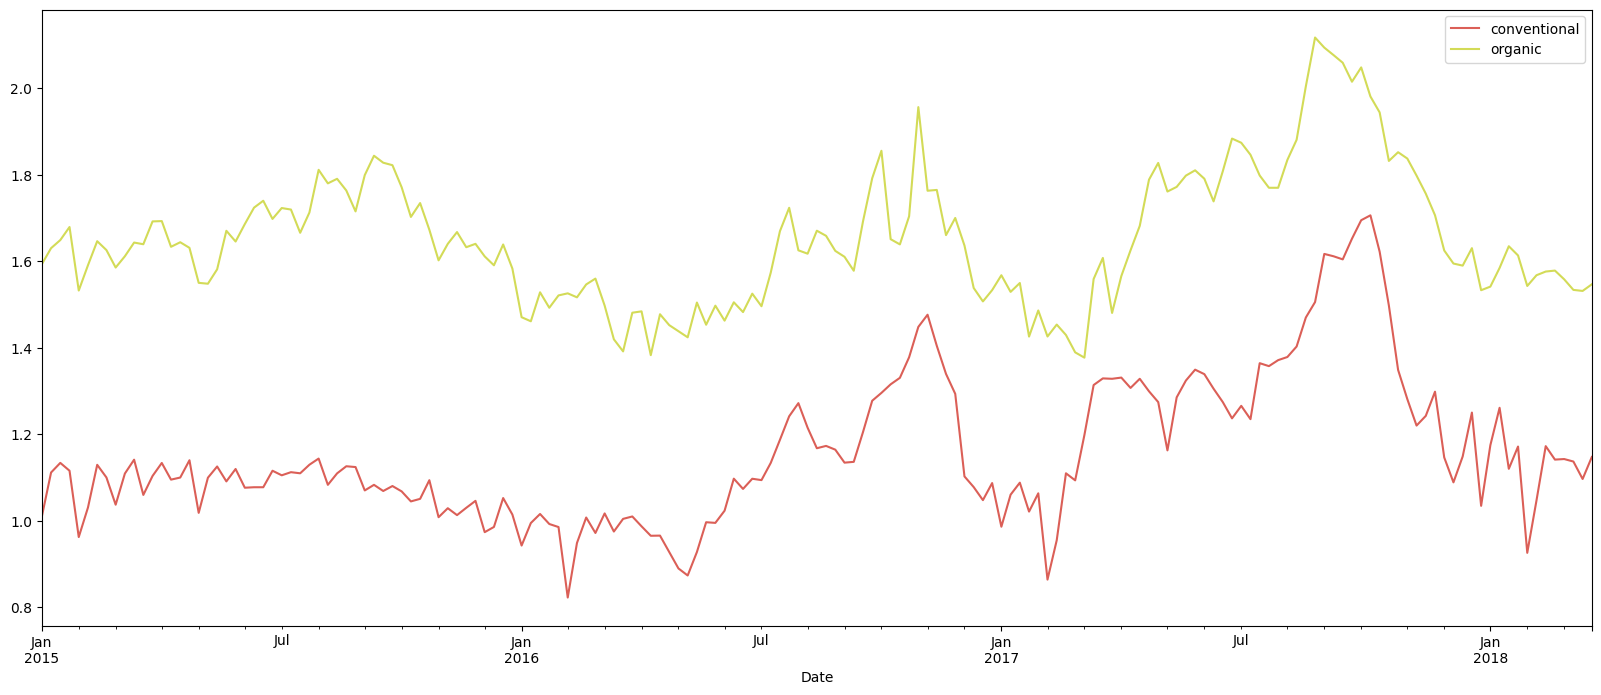

In [61]:
date_type_df.unstack().plot(figsize=(20, 8))
plt.legend(loc = 'best')
plt.show()

This shows that the average price increases in an almost similar pattern for both conventional and organic avocados. The price for organic avocados is always higher than conventional ones.

In [62]:
# Average price by type and month

month_type_df = df.groupby(['month', 'type'])['AveragePrice'].mean()
month_type_df

month  type        
1      conventional    1.069095
       organic         1.552942
2      conventional    1.017315
       organic         1.531458
3      conventional    1.126209
       organic         1.538301
4      conventional    1.142350
       organic         1.606410
5      conventional    1.089577
       organic         1.603624
6      conventional    1.149198
       organic         1.669536
7      conventional    1.212487
       organic         1.711667
8      conventional    1.235399
       organic         1.789630
9      conventional    1.294738
       organic         1.850571
10     conventional    1.349339
       organic         1.810026
11     conventional    1.206054
       organic         1.705071
12     conventional    1.077393
       organic         1.585193
Name: AveragePrice, dtype: float64

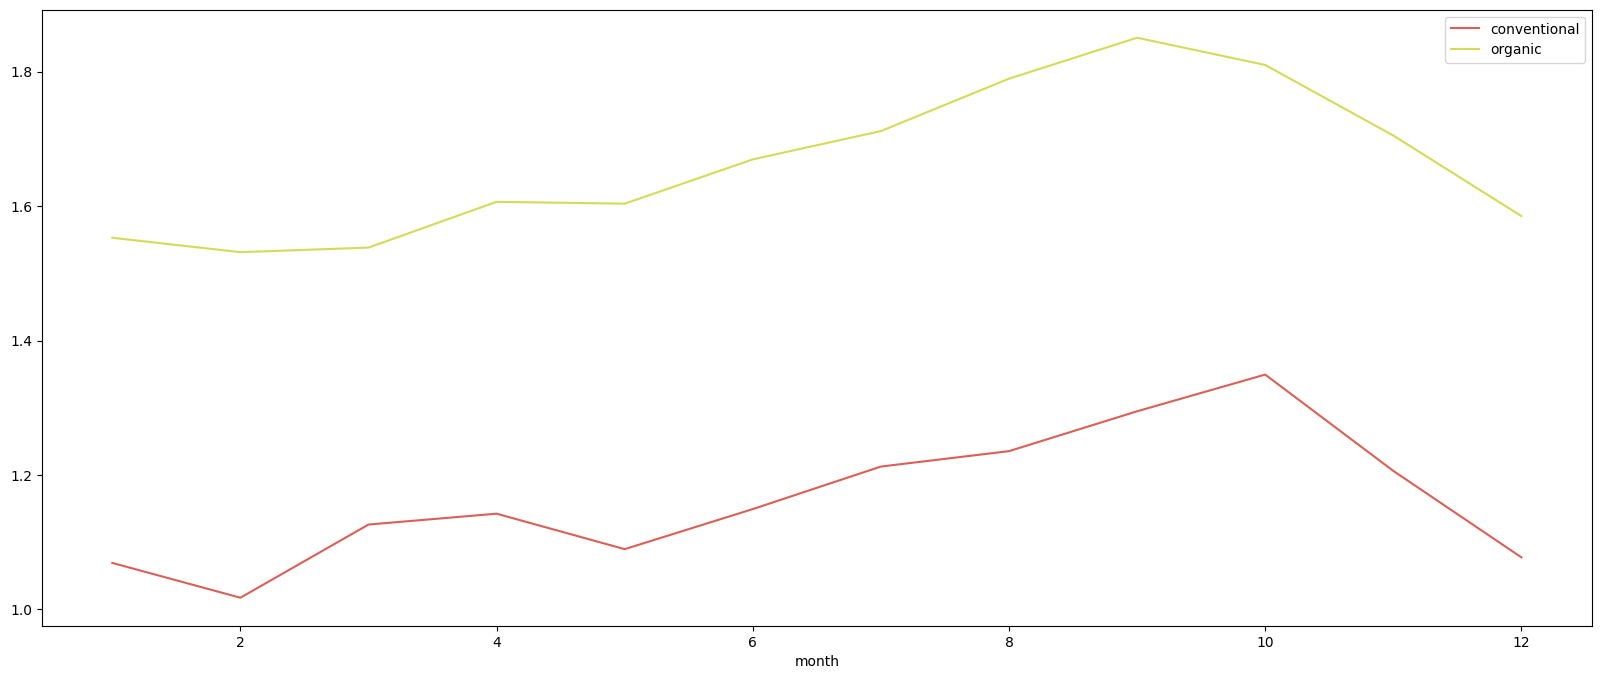

In [63]:
month_type_df.unstack().plot(figsize=(20, 8))
plt.legend(loc = 'best')
plt.show()

The monthly trend is somewhat similar for both conventional and organic types. The organic avocado seems to reach its peak price in September while the conventional one seems to reach its peak price in October.

### Checking for outliers

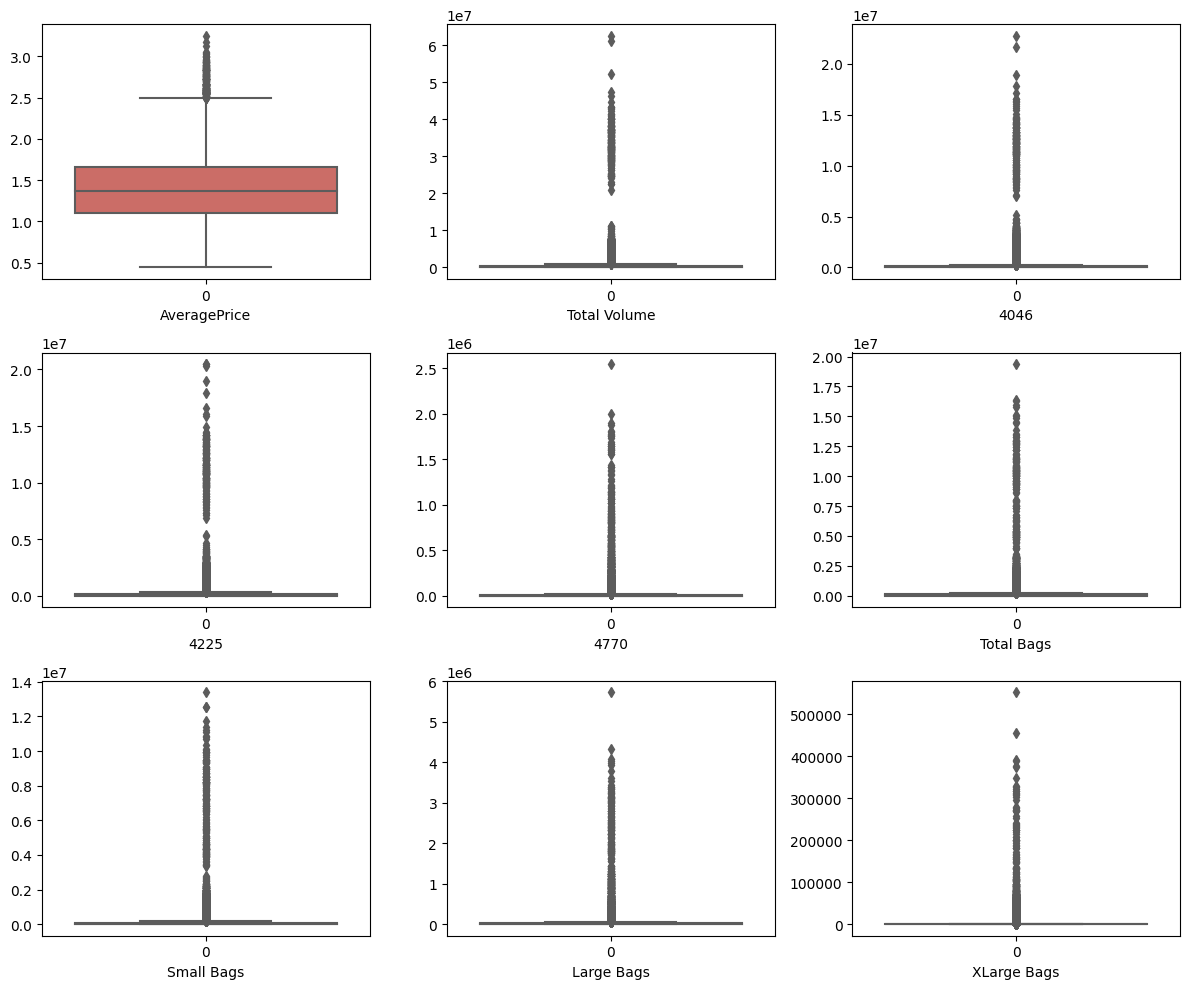

In [64]:
# Checking for outliers using boxplot
plt.figure(figsize=(12, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There seem to be a fair number of outliers for all the variables. These values need to be removed by either Z-score method or IQR method.

Before removing the outliers, we need to drop the Date column as the date column need not be considered for z-score or IQR methods.

In [65]:
df.drop(columns='Date', inplace=True)

#### Z-score method

In [66]:
from scipy.stats import zscore

In [67]:
out_features = num_cols
z = np.abs(zscore(out_features))
z

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags     month       day  
0        0.232647    0.222352      0.17558  1.647632  1.291857  
1        0.231568    0.222335      0.17558  1.647632  0.494231  
2        0.233399    0.222311      0.17558  1.647632  0.303396  
3        0.236568    0.222186      0.17558  1.647632  1.101022  
4        0.236154    0.221924      0.17558  1.364669  1.519750  
...           ...         ...          ...       ...       ...  
18244    0.226665    0.220964      0.17558  1.181997  1.328915  
18245    0.232196    0.221403      0.17558  1.464959  1.405803  
18246    0.231644    0.222561      0.17558  1.464959  0.608177  
18247    0.229543    0.222529      0.17558  1.464959  0.189449  
18248    0.228111    0.222628      0.17558  1.464959  0.987075  

[18249 rows x 11 columns]

In [68]:
# Removing data where z-score is above 3 (threshold value) for normal distribution
df_z = df[(z<3).all(axis=1)]
df_z.shape

(17651, 14)

In [69]:
# Data loss percentage
old = df.shape[0]
new_z = df_z.shape[0]

(old - new_z)/old * 100

3.276891884486821

The data loss percentage is 3.28%

#### IQR method

In [70]:
q1 = out_features.quantile(0.25)
q3 = out_features.quantile(0.75)

iqr = q3 - q1

df_q = df[~((df < (q1 - 1.5*iqr))| (df > (q3 + 1.5*iqr))).any(axis=1)]

df_q.shape

(11538, 14)

In [71]:
# Data loss percentage
old = df.shape[0]
new_q = df_q.shape[0]

(old - new_q)/old * 100

36.774617787276014

Data loss percentage is 36.77%, which is very very high. Normally, we consider the method with data loss of less than 10%.<br>

So, we will use the Z-score method to remove outliers.

In [72]:
df = df_z

In [73]:
# Numerical columns from new dataframe
df.drop(columns=['type', 'year', 'region'])
num_cols.columns.to_list()

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'month',
 'day']

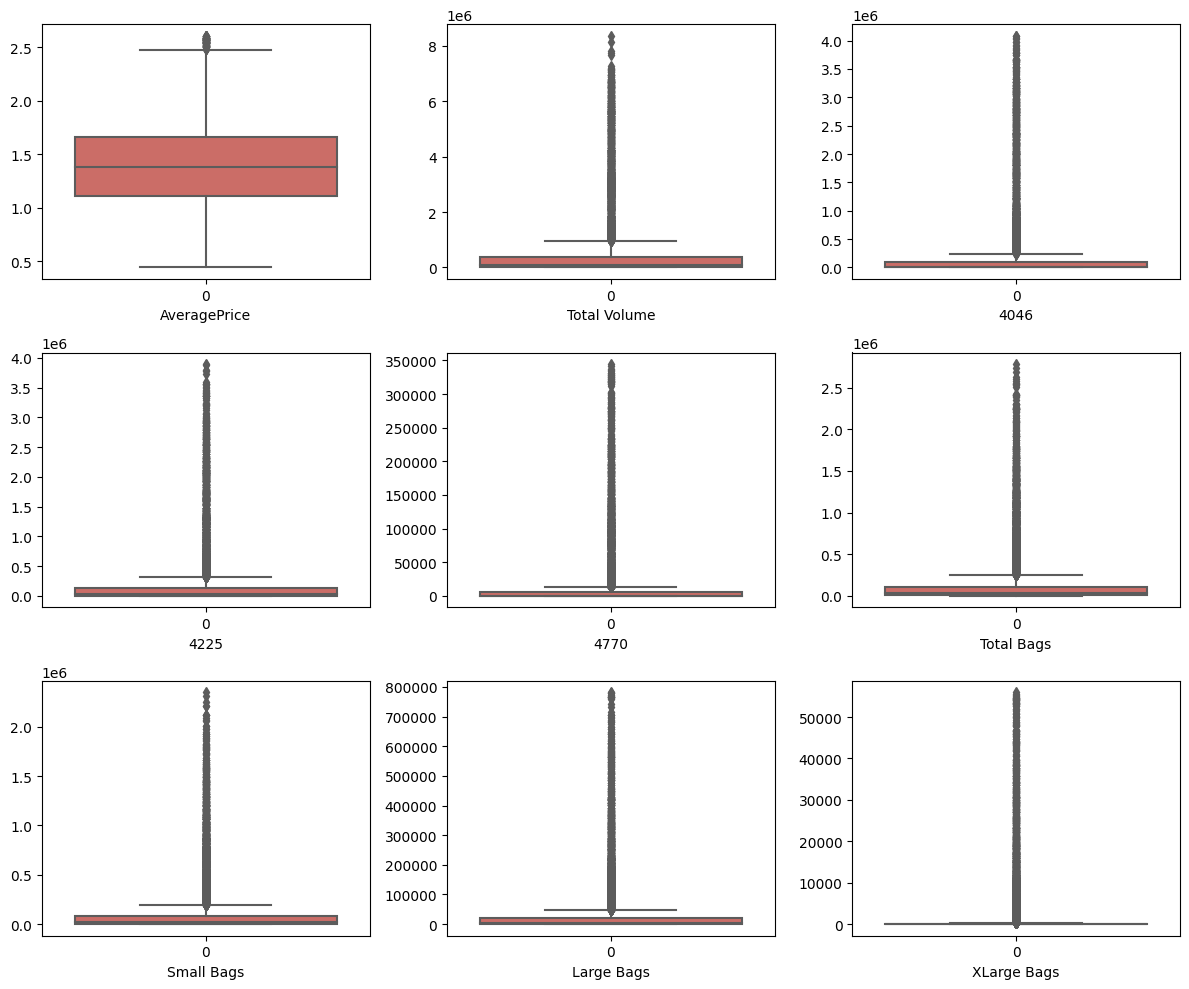

In [74]:
# Checking for outliers using boxplot again
plt.figure(figsize=(12, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There seem to be fewer outliers in the dataset compared to before using the z-score method.

### Checking for skewness

In [75]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
month           0.107408
day             0.011778
dtype: float64

The acceptable skewness range is between -0.5 to 0.5 (for extremely normal distributions)<br>
This means that Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags, are very highly skewed.

In [76]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [77]:
# Removing skewness
columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',]

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                      # Cube Root Transformation
    transformed_sqrt = np.sqrt(df[col])                      # Square Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt),
        "Square Root Transformation": stats.skew(transformed_sqrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [78]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

Total Volume      4046      4225      4770  \
Log Transformation             -0.050088       NaN       NaN       NaN   
Box-Cox Transformation          0.486629  0.534411  0.316939  0.713162   
Inverse Transformation         14.952923       NaN       NaN       NaN   
Yeo Johnson Transformation     -0.008641 -0.039279 -0.044671  0.024166   
Cube Root Transformation        1.240330  1.555744  1.276916  1.635475   
Square Root Transformation      1.963697  2.497292  2.128324  2.636433   

                            Total Bags  Small Bags  Large Bags  XLarge Bags  
Log Transformation                 NaN         NaN         NaN          NaN  
Box-Cox Transformation        0.367035    0.256059    0.246441     1.613408  
Inverse Transformation             NaN         NaN         NaN          NaN  
Yeo Johnson Transformation   -0.022202   -0.024403   -0.110904     0.853686  
Cube Root Transformation      1.231727    1.245927    1.276105     2.276834  
Square Root Transformation    2.010520    2.093575    2.236566     3.312203

The Yeo Johnson transformation is the most suitable one for bringing the values in acceptable range of -0.5 to 0.5.

In [79]:
# Transforming using YeoJohnson
for col in columns:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [80]:
df.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.859698  8.459046  18.125626  3.800782   12.604637   
1          1.35     11.679417  7.836672  17.619790  3.979574   12.771325   
2          0.93     12.561302  8.072625  19.965175  4.731656   12.482466   
3          1.08     12.096944  8.588079  18.850378  4.183730   11.861497   
4          1.28     11.596546  8.318295  17.574174  4.224040   11.974755   

   Small Bags  Large Bags  XLarge Bags          type  year  region  month  day  
0   14.988007    5.609263         -0.0  conventional  2015  Albany     12   27  
1   15.216601    5.675475         -0.0  conventional  2015  Albany     12   20  
2   14.816826    5.759783         -0.0  conventional  2015  Albany     12   13  
3   13.952201    6.154871         -0.0  conventional  2015  Albany     12    6  
4   14.081739    6.767433         -0.0  conventional  2015  Albany     11   29

These are the transformed values.

In [81]:
df.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.229976
month           0.107408
day             0.011778
dtype: float64

Now the skewness values are within the range of -0.5 to 0.5, except XLarge Bags. XLarge bags has a skewness of 0.85 which is moderately normal.

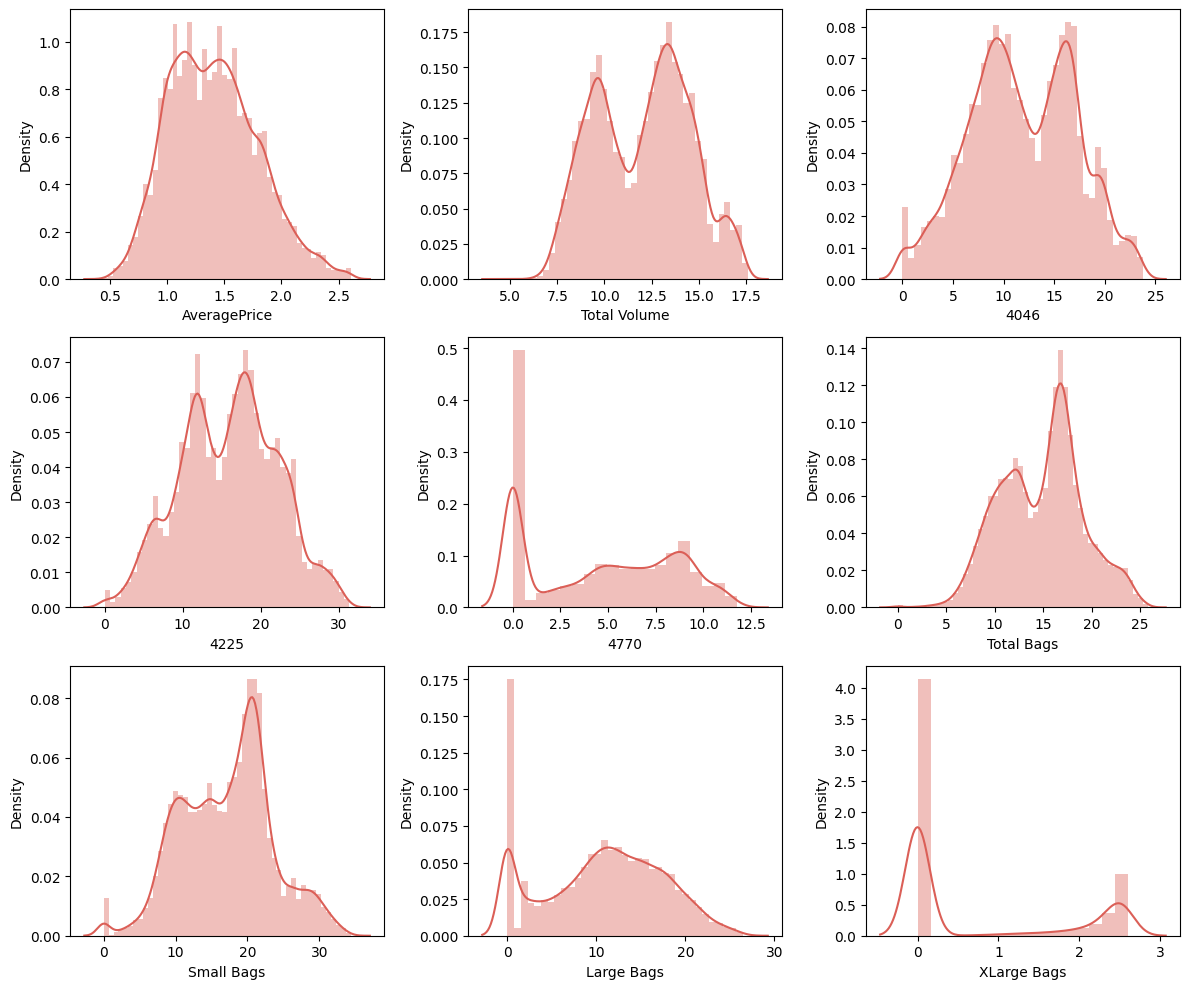

In [82]:
# Data distribution
plt.figure(figsize=(12, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The data looks almost normalised nafter removing skewness.

### Correlation analysis

In [83]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.580126 -0.554612 -0.453664 -0.493607   
Total Volume     -0.580126      1.000000  0.889248  0.924664  0.818545   
4046             -0.554612      0.889248  1.000000  0.764456  0.737191   
4225             -0.453664      0.924664  0.764456  1.000000  0.797186   
4770             -0.493607      0.818545  0.737191  0.797186  1.000000   
Total Bags       -0.564105      0.941082  0.800798  0.820596  0.761056   
Small Bags       -0.489430      0.905795  0.779462  0.786441  0.753593   
Large Bags       -0.484384      0.682569  0.603598  0.616089  0.547691   
XLarge Bags      -0.393086      0.629882  0.574335  0.584748  0.616930   
year              0.091704      0.080706  0.001350 -0.001524 -0.049934   
month             0.149502     -0.021861 -0.021731 -0.021967 -0.013533   
day               0.026819     -0.006430 -0.005191 -0.006289  0.001251   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.564105   -0.489430   -0.484384    -0.393086  0.091704   
Total Volume    0.941082    0.905795    0.682569     0.629882  0.080706   
4046            0.800798    0.779462    0.603598     0.574335  0.001350   
4225            0.820596    0.786441    0.616089     0.584748 -0.001524   
4770            0.761056    0.753593    0.547691     0.616930 -0.049934   
Total Bags      1.000000    0.949975    0.729681     0.613741  0.214666   
Small Bags      0.949975    1.000000    0.566610     0.604123  0.190267   
Large Bags      0.729681    0.566610    1.000000     0.451305  0.191742   
XLarge Bags     0.613741    0.604123    0.451305     1.000000  0.161582   
year            0.214666    0.190267    0.191742     0.161582  1.000000   
month          -0.009209   -0.004761   -0.014694     0.020729 -0.175287   
day            -0.003164   -0.000222   -0.000130     0.010752  0.004700   

                 month       day  
AveragePrice  0.149502  0.026819  
Total Volume -0.021861 -0.006430  
4046         -0.021731 -0.005191  
4225         -0.021967 -0.006289  
4770         -0.013533  0.001251  
Total Bags   -0.009209 -0.003164  
Small Bags   -0.004761 -0.000222  
Large Bags   -0.014694 -0.000130  
XLarge Bags   0.020729  0.010752  
year         -0.175287  0.004700  
month         1.000000  0.011917  
day           0.011917  1.000000

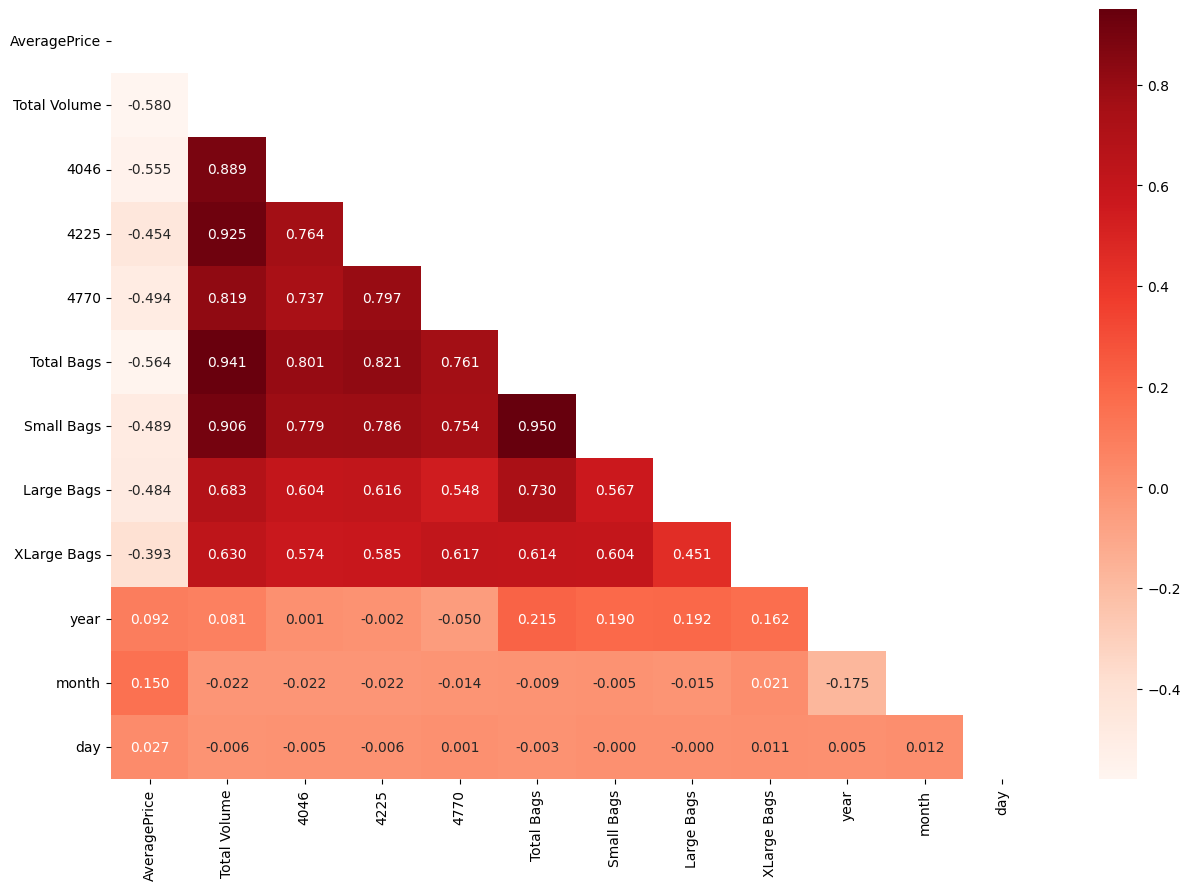

In [84]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Reds', mask=mask)
plt.show()

Observations from the correlation heatmap:
- There seem to be strong correlation between Total Bags and Small Bags, Total Bags and Total Volume, Total Volume and 4225, Total Volume and Small Bags, Total Volume and 4046, Total Volume and 4770, 4225 and Total Bags, and 4046 and Total Bags.
- There are more moderate to strong relationships observed in the data.
The strong relationships will be handled during VIF evaluation for multicollinearity issues.

### Encoding categorical variables

In [85]:
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [86]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1, 1))

In [87]:
df.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.859698  8.459046  18.125626  3.800782   12.604637   
1          1.35     11.679417  7.836672  17.619790  3.979574   12.771325   
2          0.93     12.561302  8.072625  19.965175  4.731656   12.482466   
3          1.08     12.096944  8.588079  18.850378  4.183730   11.861497   
4          1.28     11.596546  8.318295  17.574174  4.224040   11.974755   

   Small Bags  Large Bags  XLarge Bags  type  year  region  month  day  
0   14.988007    5.609263         -0.0     0  2015       0     12   27  
1   15.216601    5.675475         -0.0     0  2015       0     12   20  
2   14.816826    5.759783         -0.0     0  2015       0     12   13  
3   13.952201    6.154871         -0.0     0  2015       0     12    6  
4   14.081739    6.767433         -0.0     0  2015       0     11   29

#### Correlation analysis

In [88]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.580126 -0.554612 -0.453664 -0.493607   
Total Volume     -0.580126      1.000000  0.889248  0.924664  0.818545   
4046             -0.554612      0.889248  1.000000  0.764456  0.737191   
4225             -0.453664      0.924664  0.764456  1.000000  0.797186   
4770             -0.493607      0.818545  0.737191  0.797186  1.000000   
Total Bags       -0.564105      0.941082  0.800798  0.820596  0.761056   
Small Bags       -0.489430      0.905795  0.779462  0.786441  0.753593   
Large Bags       -0.484384      0.682569  0.603598  0.616089  0.547691   
XLarge Bags      -0.393086      0.629882  0.574335  0.584748  0.616930   
type              0.613150     -0.799821 -0.725000 -0.747349 -0.780137   
year              0.091704      0.080706  0.001350 -0.001524 -0.049934   
region           -0.003242      0.068983  0.162069  0.033926  0.041295   
month             0.149502     -0.021861 -0.021731 -0.021967 -0.013533   
day               0.026819     -0.006430 -0.005191 -0.006289  0.001251   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564105   -0.489430   -0.484384    -0.393086  0.613150   
Total Volume    0.941082    0.905795    0.682569     0.629882 -0.799821   
4046            0.800798    0.779462    0.603598     0.574335 -0.725000   
4225            0.820596    0.786441    0.616089     0.584748 -0.747349   
4770            0.761056    0.753593    0.547691     0.616930 -0.780137   
Total Bags      1.000000    0.949975    0.729681     0.613741 -0.724752   
Small Bags      0.949975    1.000000    0.566610     0.604123 -0.719063   
Large Bags      0.729681    0.566610    1.000000     0.451305 -0.498894   
XLarge Bags     0.613741    0.604123    0.451305     1.000000 -0.665473   
type           -0.724752   -0.719063   -0.498894    -0.665473  1.000000   
year            0.214666    0.190267    0.191742     0.161582  0.003867   
region          0.071460    0.057312    0.089954    -0.019668  0.018409   
month          -0.009209   -0.004761   -0.014694     0.020729 -0.009499   
day            -0.003164   -0.000222   -0.000130     0.010752 -0.002287   

                  year    region     month       day  
AveragePrice  0.091704 -0.003242  0.149502  0.026819  
Total Volume  0.080706  0.068983 -0.021861 -0.006430  
4046          0.001350  0.162069 -0.021731 -0.005191  
4225         -0.001524  0.033926 -0.021967 -0.006289  
4770         -0.049934  0.041295 -0.013533  0.001251  
Total Bags    0.214666  0.071460 -0.009209 -0.003164  
Small Bags    0.190267  0.057312 -0.004761 -0.000222  
Large Bags    0.191742  0.089954 -0.014694 -0.000130  
XLarge Bags   0.161582 -0.019668  0.020729  0.010752  
type          0.003867  0.018409 -0.009499 -0.002287  
year          1.000000 -0.004417 -0.175287  0.004700  
region       -0.004417  1.000000  0.000119 -0.000046  
month        -0.175287  0.000119  1.000000  0.011917  
day           0.004700 -0.000046  0.011917  1.000000

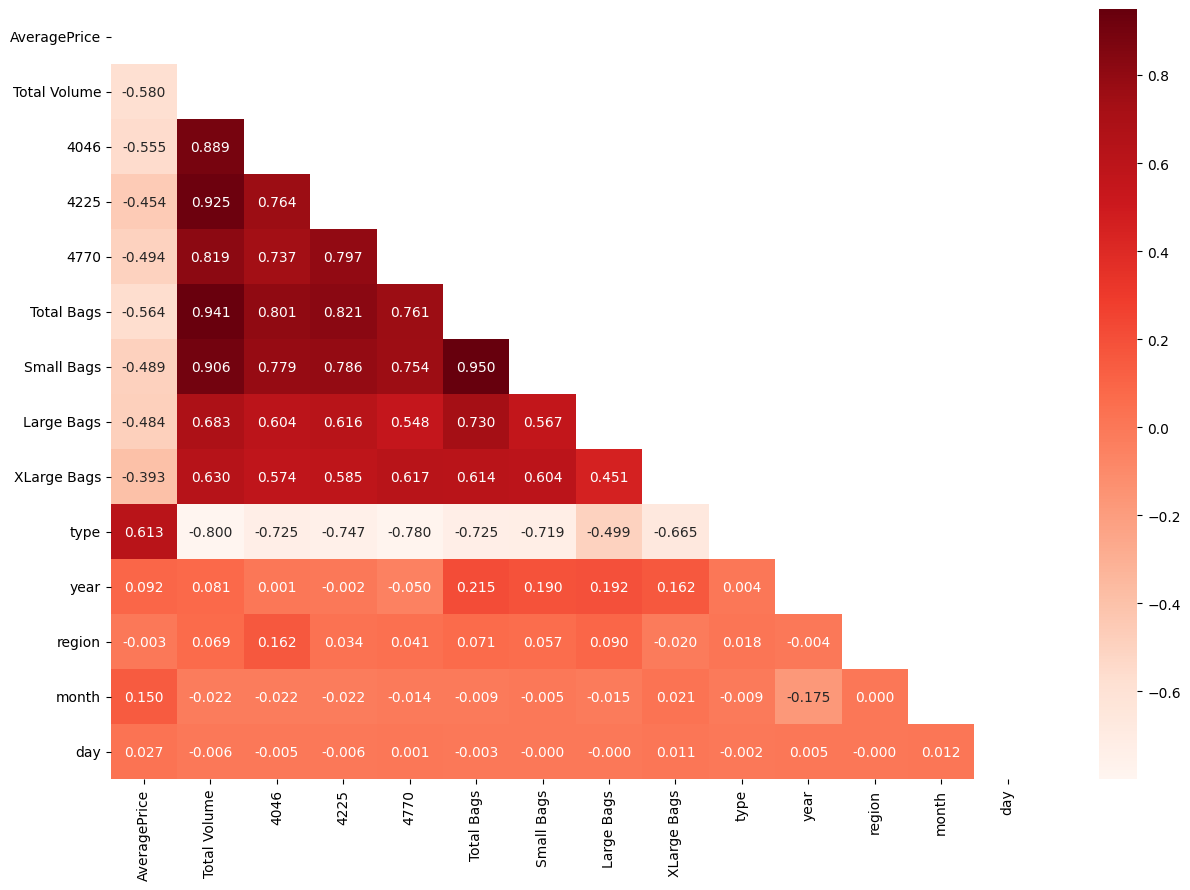

In [89]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Reds', mask=mask)
plt.show()

Based on the categorical columns, we can observe that there is a moderate positive correlation between AveragePrice and type.<br>
There are moderate to strong negative correlations between type and the following variables:
- Total Volume
- 4046
- 4225
- 4770
- Total Bags
- Small Bags

In [90]:
df.corr()['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.613150
month           0.149502
year            0.091704
day             0.026819
region         -0.003242
XLarge Bags    -0.393086
4225           -0.453664
Large Bags     -0.484384
Small Bags     -0.489430
4770           -0.493607
4046           -0.554612
Total Bags     -0.564105
Total Volume   -0.580126
Name: AveragePrice, dtype: float64

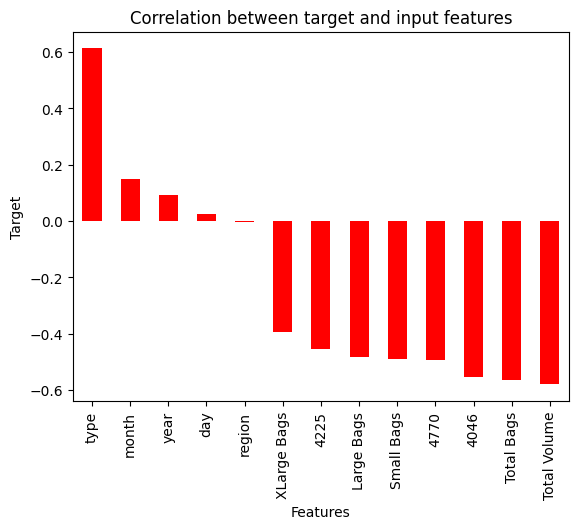

In [91]:
# Visualising the correlation between target (AveragePrice) and input features
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar', color='red')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

type, Total Volume and Total Bags seem to have the maximum correlation with AveragePrice.

In [92]:
df.corr()['region'].sort_values(ascending=False)

region          1.000000
4046            0.162069
Large Bags      0.089954
Total Bags      0.071460
Total Volume    0.068983
Small Bags      0.057312
4770            0.041295
4225            0.033926
type            0.018409
month           0.000119
day            -0.000046
AveragePrice   -0.003242
year           -0.004417
XLarge Bags    -0.019668
Name: region, dtype: float64

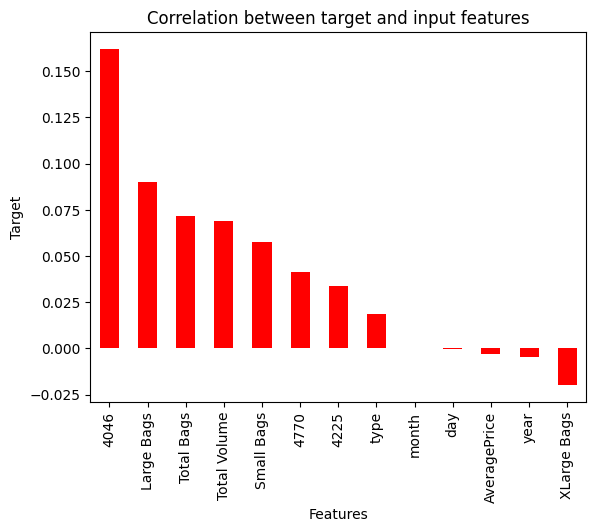

In [93]:
# Visualising the correlation between target (region) and input features
df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar', color='red')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

The target variable (region) seems to have very less correlation with any of the other variables.

## Part 1: Predicting Average Price

### Separating features and target

In [94]:
x = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

#### Feature scaling

In [95]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   -0.347421   
1     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   -0.311322   
2      0.205556 -0.731776  0.649333  0.023923   -0.566369   -0.374453   
3      0.019655 -0.632592  0.468799 -0.121164   -0.713068   -0.510991   
4     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   -0.490534   

   Large Bags  XLarge Bags      type      year    region     month       day  
0   -0.781153    -0.677919 -1.019047 -1.210013 -1.695495  1.644612  1.289309  
1   -0.771198    -0.677919 -1.019047 -1.210013 -1.695495  1.644612  0.491652  
2   -0.758523    -0.677919 -1.019047 -1.210013 -1.695495  1.644612 -0.306004  
3   -0.699123    -0.677919 -1.019047 -1.210013 -1.695495  1.644612 -1.103660  
4   -0.607027    -0.677919 -1.019047 -1.210013 -1.695495  1.362113  1.517211

### Checking Variance Inflation Factor (VIF)

In [96]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features        VIF
0   Total Volume  53.875835
1           4046   7.258553
2           4225  11.390222
3           4770   3.953072
4     Total Bags  35.136063
5     Small Bags  16.629510
6     Large Bags   3.460667
7    XLarge Bags   2.055389
8           type   3.700460
9           year   1.394885
10        region   1.086996
11         month   1.056121
12           day   1.000836

The VIF values should be below 5. Here, we can observe that VIF values for Total Volume, Total Bags, Small Bags are all higher. So we need to remove the column with highest VIF value to avoid multicollinearity.

In [97]:
x.drop(columns='Total Volume', inplace=True)

In [98]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features        VIF
0          4046   3.750399
1          4225   4.327348
2          4770   3.939483
3    Total Bags  24.583250
4    Small Bags  16.628554
5    Large Bags   3.416741
6   XLarge Bags   2.041333
7          type   3.481877
8          year   1.392302
9        region   1.079248
10        month   1.053909
11          day   1.000748

Total Bags and Small Bags still have high VIF values, so we will remove Total Bags column as well.

In [99]:
x.drop(columns='Total Bags', inplace=True)

In [100]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features       VIF
0          4046  3.729515
1          4225  4.171259
2          4770  3.939170
3    Small Bags  4.132209
4    Large Bags  1.871948
5   XLarge Bags  2.040735
6          type  3.478038
7          year  1.365926
8        region  1.079222
9         month  1.053036
10          day  1.000592

The VIF values are all within range now. So, we can proceed to build the model.

### Model Building

In [101]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Splitting data into train and test

In [102]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = r2_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.5276843930939177
Random state for best accuracy: 6


In [103]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=max_rs)

#### Regression models

In [104]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost

In [105]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regressor', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('XGBoost', xgboost.XGBRegressor())
]

results = []

for model_name, model in models:
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append((model_name, mae, rmse, r2))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
df_results.sort_values('R2', ascending=False, inplace=True)

df_results

Model       MAE      RMSE        R2
5               Extra Trees  0.083351  0.121480  0.901259
9                   XGBoost  0.092927  0.126872  0.892299
4             Random Forest  0.092382  0.132569  0.882410
1  Support Vector Regressor  0.132754  0.178063  0.787854
2                       KNN  0.130361  0.178832  0.786017
3             Decision Tree  0.129311  0.195196  0.745066
6         Gradient Boosting  0.150005  0.196848  0.740733
0         Linear Regression  0.209229  0.265688  0.527684
8                     Ridge  0.209229  0.265689  0.527683
7                     Lasso  0.315801  0.386617 -0.000113

Extra Trees Regressor model seems to have the best R2 score on the test data. The Lasso model has negative R2 score, which means its performance is bad.

#### Cross validation

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
results = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2') # Using fold value of 5
    mean_score = cv_score.mean()
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    diff = abs(r2 - mean_score)
    
    results.append((model_name, mae, rmse, r2, mean_score, diff))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2', 'CV R2', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

Model       MAE      RMSE        R2     CV R2  \
7                     Lasso  0.315801  0.386617 -0.000113 -0.000736   
6         Gradient Boosting  0.150005  0.196848  0.740733  0.730854   
5               Extra Trees  0.083254  0.121341  0.901484  0.890620   
9                   XGBoost  0.092927  0.126872  0.892299  0.880690   
4             Random Forest  0.092536  0.132666  0.882238  0.867233   
1  Support Vector Regressor  0.132754  0.178063  0.787854  0.772011   
2                       KNN  0.130361  0.178832  0.786017  0.763801   
8                     Ridge  0.209229  0.265689  0.527683  0.501651   
0         Linear Regression  0.209229  0.265688  0.527684  0.501651   
3             Decision Tree  0.128531  0.195504  0.744259  0.714535   

   Difference  
7    0.000623  
6    0.009879  
5    0.010865  
9    0.011609  
4    0.015004  
1    0.015843  
2    0.022217  
8    0.026032  
0    0.026034  
3    0.029724

The Lasso model has negative R2 score, so we need to discard it. Gradient Boosting Regressor model has the least difference between cross validation R2 and test R2 scores. So it is the least overfitting model.

#### Hyperparameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

##### Gradient Boosting

In [109]:
params = {
    "n_estimators": [5, 50, 100, 250],
    "max_depth": [1, 3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 1],
    "loss": ['squared_error', 'absolute_error', 'huber', 'quantile']
    }

In [110]:
gcv = GridSearchCV(GradientBoostingRegressor(), params, cv=5, scoring='r2')
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 100, 250]},
             scoring='r2')

In [111]:
best_params = gcv.best_params_
best_params

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 9,
 'n_estimators': 250}

In [112]:
model_gb = GradientBoostingRegressor(**best_params)
model_gb.fit(x_train, y_train)
y_pred = model_gb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 0.08202093556787861
Root Mean Squared Error: 0.11616582001397179
R2 Score: 0.9097090130616219


The R2 score is 90.97%

### Saving the model

In [113]:
import pickle

In [114]:
filename = 'avocado_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Predicting using the saved model

In [115]:
model = pickle.load(open('avocado_regression_model.pkl', 'rb'))

pred = model_gb.predict(x_test)

In [116]:
pred_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
pred_df.head(25)

Actual  Predicted
0     0.76   0.803307
1     0.96   1.155051
2     1.03   0.975907
3     0.84   1.004747
4     1.77   1.783520
5     1.36   1.444462
6     0.98   0.908592
7     0.90   0.926964
8     1.07   1.096838
9     1.25   1.320757
10    1.20   1.313364
11    1.88   1.838640
12    1.26   1.196524
13    1.81   1.739162
14    1.09   1.059688
15    0.86   0.843612
16    1.59   1.625576
17    1.52   1.486195
18    0.83   0.796700
19    1.31   1.317023
20    1.45   1.413696
21    1.11   1.283504
22    1.74   1.696000
23    1.79   1.479629
24    1.30   1.298141

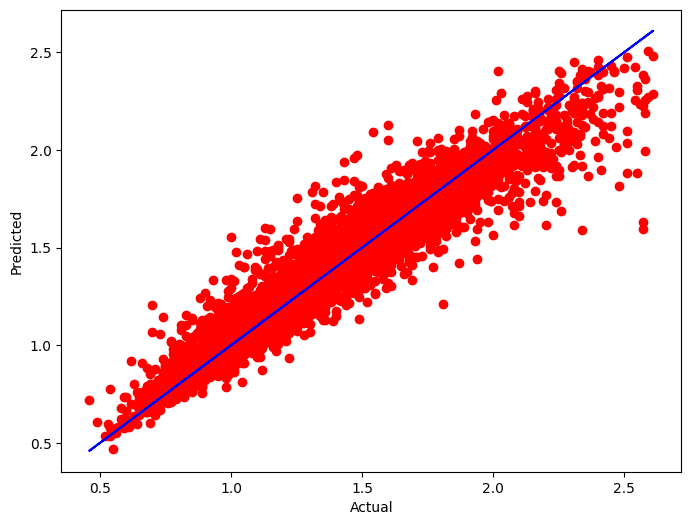

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

These are the final predictions.

## Part 1: Predicting the Region

### Separating features and target

In [118]:
df

AveragePrice  Total Volume       4046       4225      4770  Total Bags  \
0              1.33     11.859698   8.459046  18.125626  3.800782   12.604637   
1              1.35     11.679417   7.836672  17.619790  3.979574   12.771325   
2              0.93     12.561302   8.072625  19.965175  4.731656   12.482466   
3              1.08     12.096944   8.588079  18.850378  4.183730   11.861497   
4              1.28     11.596546   8.318295  17.574174  4.224040   11.974755   
...             ...           ...        ...        ...       ...         ...   
18244          1.63     10.353750   9.474294  10.237344 -0.000000   13.438887   
18245          1.71     10.121168   8.663815  11.814608 -0.000000   12.723133   
18246          1.87     10.111306   8.664087  11.145900  6.324553   12.749156   
18247          1.93     10.294842   9.032839  11.531973  6.323378   13.042032   
18248          1.62     10.380810  10.006435  11.067127  5.237126   13.215330   

       Small Bags  Large Bags  XLarge Bags  type  year  region  month  day  
0       14.988007    5.609263         -0.0     0  2015       0     12   27  
1       15.216601    5.675475         -0.0     0  2015       0     12   20  
2       14.816826    5.759783         -0.0     0  2015       0     12   13  
3       13.952201    6.154871         -0.0     0  2015       0     12    6  
4       14.081739    6.767433         -0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244   16.075093    8.061951         -0.0     1  2018      53      2    4  
18245   15.085843    7.579136         -0.0     1  2018      53      1   28  
18246   15.201193    4.481260         -0.0     1  2018      53      1   21  
18247   15.602341    4.711895         -0.0     1  2018      53      1   14  
18248   15.847112    3.833599         -0.0     1  2018      53      1    7  

[17651 rows x 14 columns]

In [119]:
x = df.drop('region', axis=1)
y = df['region']

#### Feature scaling

In [120]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0     -0.195352     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1     -0.143510     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2     -1.232207      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3     -0.843387      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4     -0.324959     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   

   Small Bags  Large Bags  XLarge Bags      type      year     month       day  
0   -0.347421   -0.781153    -0.677919 -1.019047 -1.210013  1.644612  1.289309  
1   -0.311322   -0.771198    -0.677919 -1.019047 -1.210013  1.644612  0.491652  
2   -0.374453   -0.758523    -0.677919 -1.019047 -1.210013  1.644612 -0.306004  
3   -0.510991   -0.699123    -0.677919 -1.019047 -1.210013  1.644612 -1.103660  
4   -0.490534   -0.607027    -0.677919 -1.019047 -1.210013  1.362113  1.517211

### Checking Variance Inflation Factor (VIF)

In [121]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features        VIF
0   AveragePrice   2.285036
1   Total Volume  54.881098
2           4046   6.915890
3           4225  12.459991
4           4770   3.967551
5     Total Bags  36.069098
6     Small Bags  17.304272
7     Large Bags   3.478073
8    XLarge Bags   2.047554
9           type   4.205576
10          year   1.534888
11         month   1.141112
12           day   1.001936

The VIF values should be below 5. Here, we can observe that VIF values for Total Volume, Total Bags, Small Bags are all higher. So we need to remove the column with highest VIF value to avoid multicollinearity.

In [122]:
x.drop(columns='Total Volume', inplace=True)

In [123]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features        VIF
0   AveragePrice   2.227192
1           4046   3.593664
2           4225   4.678803
3           4770   3.957870
4     Total Bags  26.871588
5     Small Bags  17.293065
6     Large Bags   3.424816
7    XLarge Bags   2.035720
8           type   4.074667
9           year   1.534812
10         month   1.141111
11           day   1.001919

Total Bags and Small Bags still have high VIF values, so we will remove Total Bags column as well.

In [124]:
x.drop(columns='Total Bags', inplace=True)

In [125]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features       VIF
0   AveragePrice  2.037477
1           4046  3.586345
2           4225  4.372330
3           4770  3.957257
4     Small Bags  4.192588
5     Large Bags  2.078512
6    XLarge Bags  2.035453
7           type  4.043740
8           year  1.464268
9          month  1.127977
10           day  1.001915

The VIF values are all within range now. So, we can proceed to build the model.

### Model Building

In [126]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Splitting data into train and test

In [127]:
# Finding the best random state for splitting the data into training and validation sets.
max_accu = 0
max_rs = 0
for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.3,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression(multi_class='multinomial')
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.5088746223564955
Random state for best accuracy: 261


In [128]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

#### Checking for class imbalance

In [129]:
y_train.value_counts()

11    237
49    237
4     237
10    237
18    237
34    237
23    237
19    237
38    237
9     237
0     237
26    237
44    237
27    237
30    237
13    237
39    237
35    236
1     236
8     236
20    236
12    236
2     236
16    236
28    236
32    236
5     236
41    235
33    235
40    235
14    235
50    235
31    234
24    234
21    233
25    233
48    233
17    232
53    232
22    232
7     232
36    231
47    230
3     230
37    230
43    228
29    227
46    215
42    211
45    204
6     203
15    190
52    179
51    118
Name: region, dtype: int64

There seems to be no class imbalance, and all regions are almost equally represented.

#### Classification Models

In [130]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [131]:
models = [
    ('Logistic Regression', LogisticRegression(multi_class='multinomial')),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

Model  Accuracy
5                Extra Trees  0.925793
9                   CatBoost  0.914275
4              Random Forest  0.908799
8                    XGBoost  0.877644
7          Gradient Boosting  0.830438
3              Decision Tree  0.780967
1  Support Vector Classifier  0.779456
2                        KNN  0.604796
0        Logistic Regression  0.508875
6                   AdaBoost  0.056080

We can observe that Extra Trees model performs the best on test data with 91.8% accuracy, while AdaBoost oerforms the worst.

#### Confusion matrices

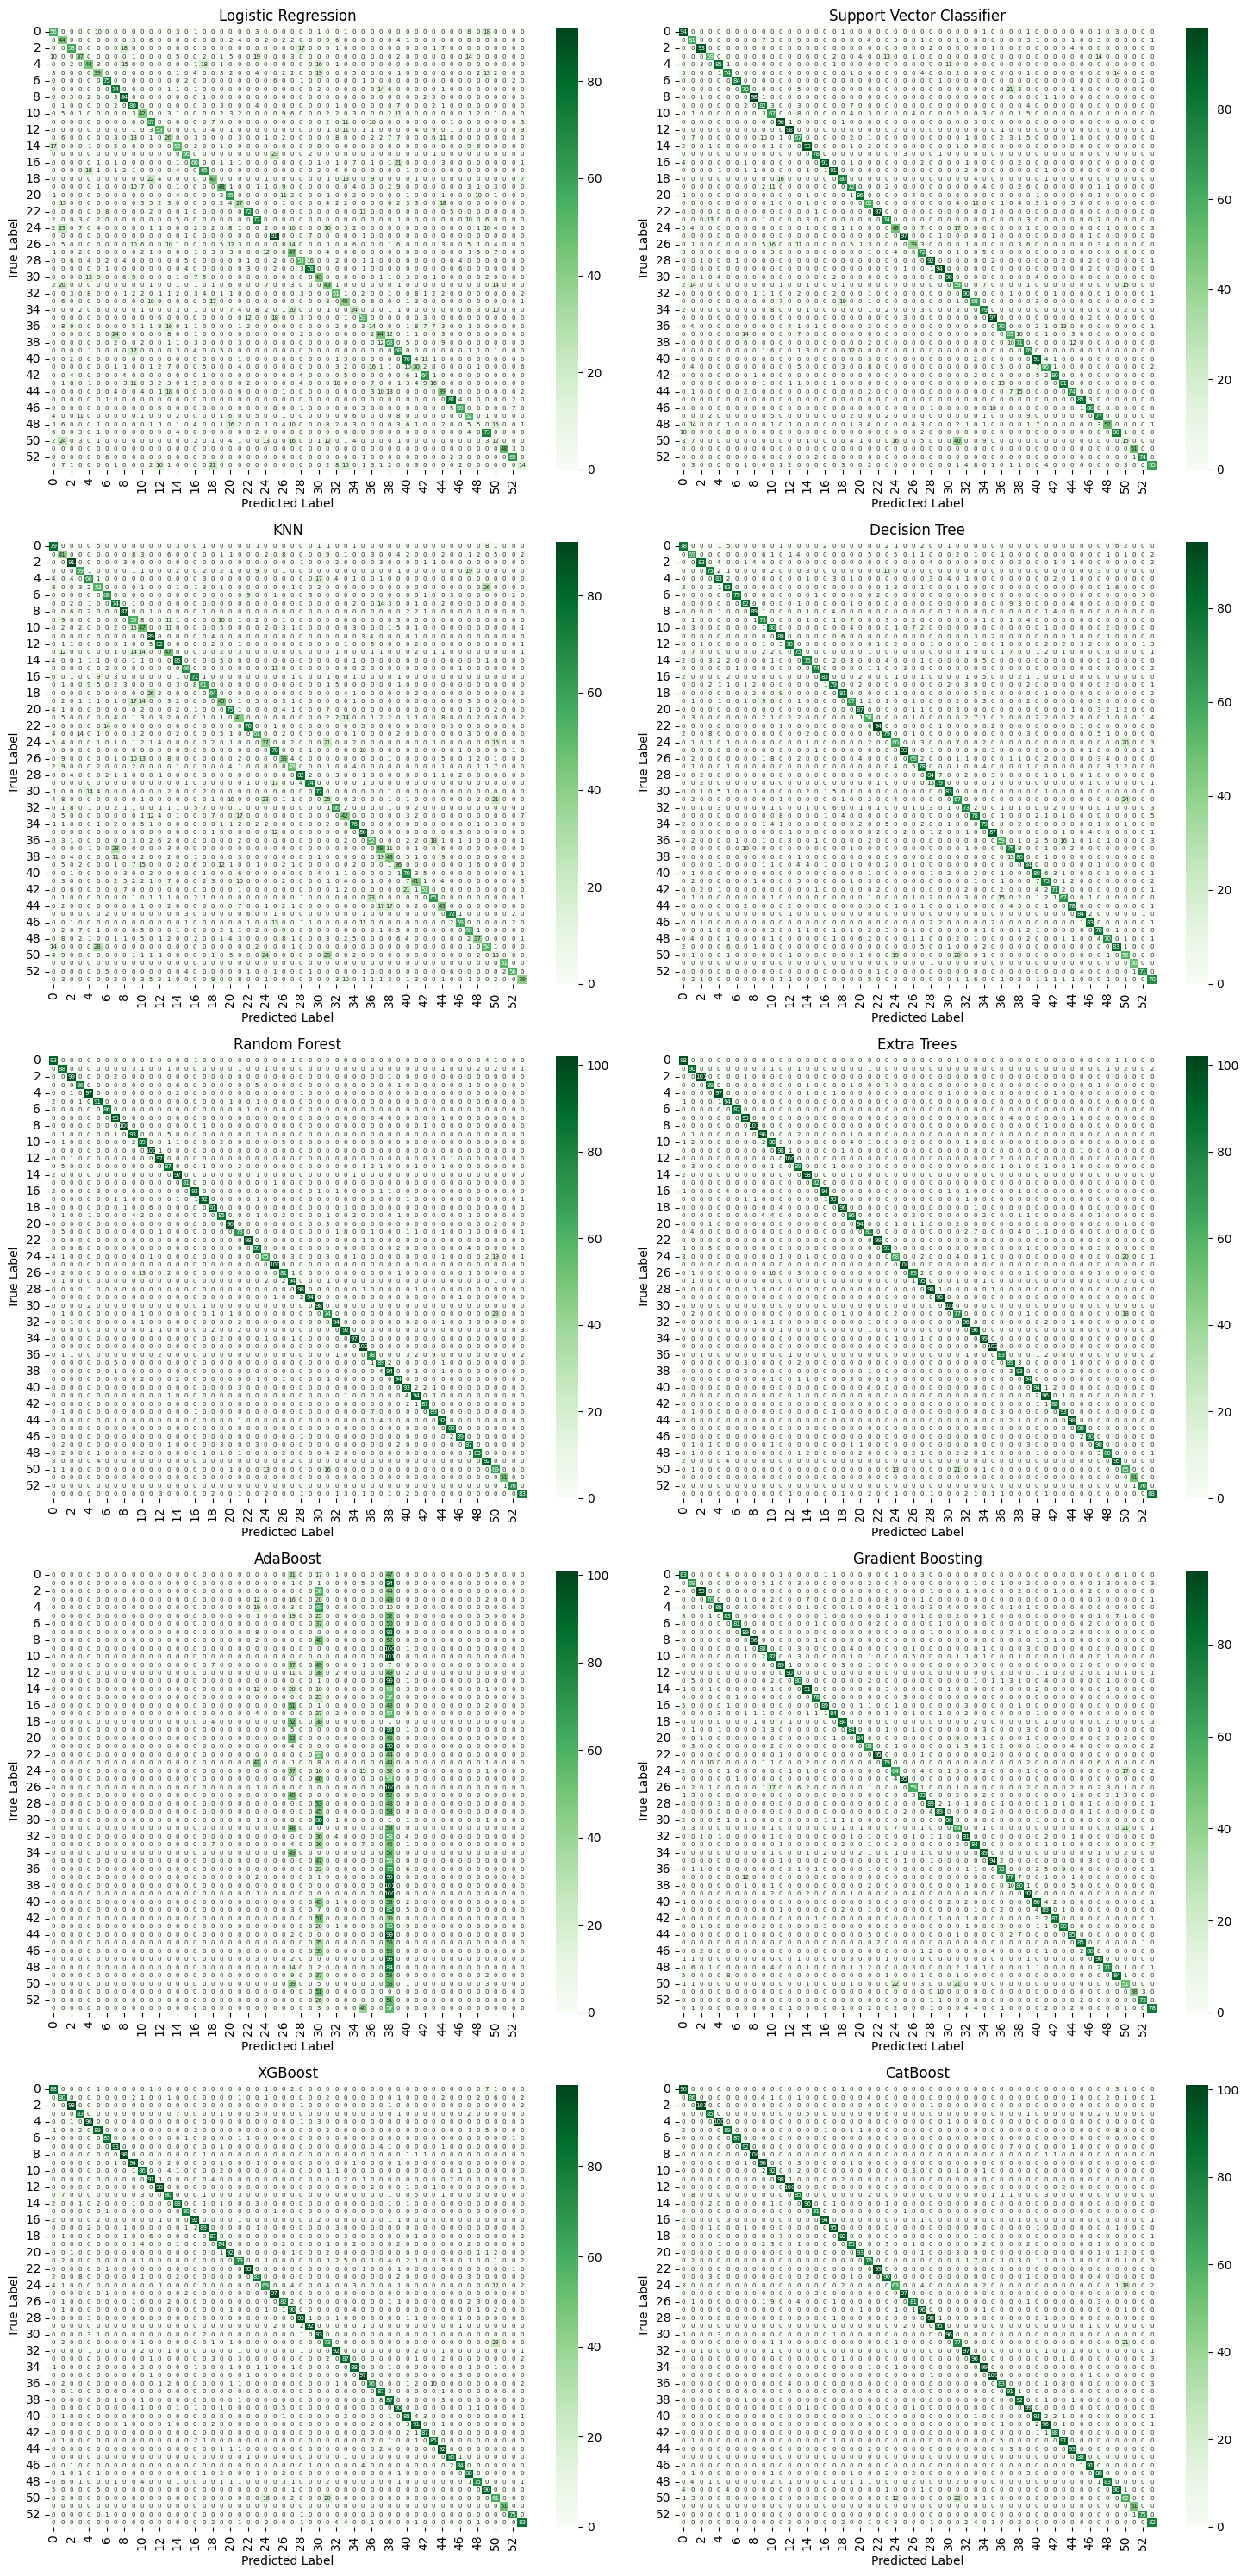

In [132]:
plt.figure(figsize=(15, 30))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(5, 2, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={"size": 5})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification reports

In [133]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       0.52      0.55      0.54       101
           1       0.26      0.44      0.33       101
           2       0.59      0.57      0.58       102
           3       0.54      0.37      0.44        99
           4       0.48      0.44      0.46       101
           5       0.49      0.38      0.43       102
           6       0.81      0.86      0.83        87
           7       0.61      0.74      0.67       100
           8       0.61      0.82      0.70       102
           9       0.48      0.79      0.60       101
          10       0.59      0.42      0.49       101
          11       0.53      0.66      0.59       101
          12       0.47      0.52      0.50       102
          13       0.27      0.26      0.26       101
          14       0.54      0.51      0.53       101
          15       0.79      0.68      0.73        82
          16       0.54      0.59      0.56       102
       

For Extra Trees model, both precision and recall values are also high along with the accuracy.

#### Using Cross Validation

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

Model  CV Accuracy  Accuracy  Difference
6                   AdaBoost     0.062728  0.056080    0.006648
4              Random Forest     0.900283  0.908799    0.008516
7          Gradient Boosting     0.820963  0.830438    0.009475
3              Decision Tree     0.772157  0.782855    0.010698
5                Extra Trees     0.914529  0.926548    0.012020
9                   CatBoost     0.901983  0.914275    0.012292
8                    XGBoost     0.864104  0.877644    0.013540
0        Logistic Regression     0.483448  0.508875    0.025427
2                        KNN     0.569243  0.604796    0.035553
1  Support Vector Classifier     0.737110  0.779456    0.042346

We can see that AdaBoost model has performed the worst on the test data as well as the validation data. So, we are discarding the AdaBoost model.<br>
The Random Forest model is the least overfitting model, so we will try to tune the Random Forest model.

#### Hyperparameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV

##### Random Forest

In [137]:
params = {
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators': [10, 20, 30, 50, 70, 100, 120],
    'max_features': ['auto', 'sqrt', 'log2']
    }

In [138]:
gcv = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 50, 70, 100, 120]},
             scoring='accuracy')

In [139]:
best_params = gcv.best_params_
best_params

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [140]:
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.9182401812688822


#### Plotting ROC for the model

In [141]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

##### Random Forest

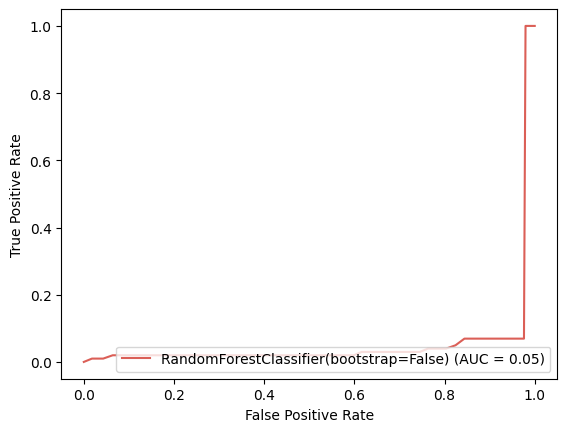

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf, pos_label=True)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_rf)
display.plot()
plt.show()

The AUC value for Random Forest Classifier is 0.05

### Saving the model

In [143]:
import pickle

In [144]:
filename = 'avocado_classification_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

#### Predicting using the saved model

In [145]:
model = pickle.load(open('avocado_classification_model.pkl', 'rb'))

pred = model.predict(x_test)

In [148]:
test_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
test_df

Actual  Predicted
0         14         14
1         52         52
2         49         49
3         42         42
4         48         48
...      ...        ...
5291      50         31
5292       3          3
5293      23         23
5294      25         25
5295      19         19

[5296 rows x 2 columns]

These are the final predictions.

In [ ]:
test_df.to_csv('avocado_predictions.csv')